In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit

In [2]:
def select_country(df, name, features, target):
    country = df[df['Country'] == name]
    data = country[['Year'] + features + [target]].copy()
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data = data.set_index('Year')
    return data

In [3]:

def split_sequence(X, y, n_in, n_out):
    X_seq, y_seq = [], []
    for i in range(len(X)):
        end_ix = i + n_in
        out_end_ix = end_ix + n_out
        if out_end_ix > len(X):
            break
        seq_x, seq_y = X[i:end_ix], y[end_ix:out_end_ix]
        X_seq.append(seq_x)
        y_seq.append(seq_y)
    return np.array(X_seq), np.array(y_seq)

In [4]:
def metric(fcast, test):
    mae = mean_absolute_error(test, fcast)
    mse = mean_squared_error(test, fcast)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(test, fcast)
    print(f'MAE : {mae}')
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')


In [5]:

def build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=200, learning_rate=0.001, batch_size=32):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(200, activation='relu', input_shape=(n_in, n_features), return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(50, activation='relu'),
        tf.keras.layers.Dense(n_out)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model


In [6]:

emissions_log = pd.read_excel(r"C:\Users\DELL PC\Downloads\GHGlogtransformated.xlsx")

features = ['Energy']
target = 'Total GHG emissions without LULUCF'
start_year = 2022
n_in, n_out = 4, 9

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Australia (Fold 1):
MAE : 0.2199719209013352
MSE : 0.052138988564244204
RMSE : 0.2283396342386582
MAPE : 0.03497056317455596


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Australia (Fold 2):
MAE : 0.36943077180611006
MSE : 0.1377447466537587
RMSE : 0.37113979395068736
MAPE : 0.05872972872909989


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Australia (Fold 3):
MAE : 0.3207347592959658
MSE : 0.1041539311259605
RMSE : 0.3227288817660429
MAPE : 0.05110911209837595


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Australia (Fold 4):
MAE : 0.5694003759642401
MSE : 0.32487276220572214
RMSE : 0.5699761066972212
MAPE : 0.09025852364216609


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Australia (Fold 5):
MAE : 0.2947049072835262
MSE : 0.08743467255479126
RMSE : 0.29569354500021006
MAPE : 0.046935929669584375
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       6.470315
2023-12-31       6.665755
2024-12-31       6.560226
2025-12-31       6.522313
2026-12-31       6.629588
2027-12-31       6.477323
2028-12-31       6.560686
2029-12-31       6.551715
2030-12-31       6.622590


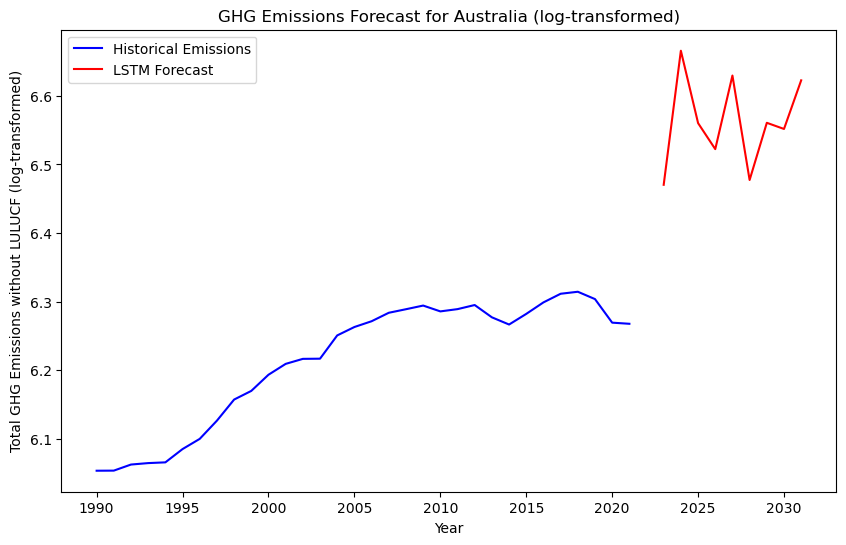

            LSTM Forecast
2022-12-31     645.686829
2023-12-31     785.055725
2024-12-31     706.431641
2025-12-31     680.149536
2026-12-31     757.169861
2027-12-31     650.227966
2028-12-31     706.756104
2029-12-31     700.444275
2030-12-31     751.889954


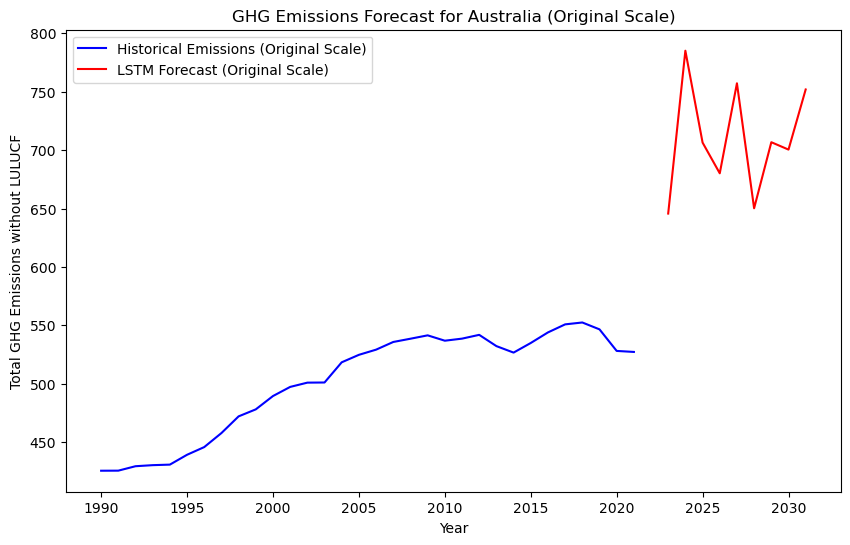

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Austria (Fold 1):
MAE : 0.1571897777602794
MSE : 0.027162011789259883
RMSE : 0.16480901610427715
MAPE : 0.035494515423744814


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Austria (Fold 2):
MAE : 0.2011056278943378
MSE : 0.04393818373460175
RMSE : 0.20961436910336503
MAPE : 0.04567134700754718


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Austria (Fold 3):
MAE : 0.46633986561179636
MSE : 0.22651739952454855
RMSE : 0.4759384408981361
MAPE : 0.10690776530587646


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Austria (Fold 4):
MAE : 0.38481521590248047
MSE : 0.15127554920577493
RMSE : 0.3889415755685871
MAPE : 0.08774167179929354


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Austria (Fold 5):
MAE : 0.03526974786493753
MSE : 0.0017407046949091591
RMSE : 0.0417217532578529
MAPE : 0.008113953591834212
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       4.116993
2023-12-31       4.104550
2024-12-31       4.161937
2025-12-31       4.179105
2026-12-31       4.125333
2027-12-31       4.131537
2028-12-31       4.130399
2029-12-31       4.137611
2030-12-31       4.147963


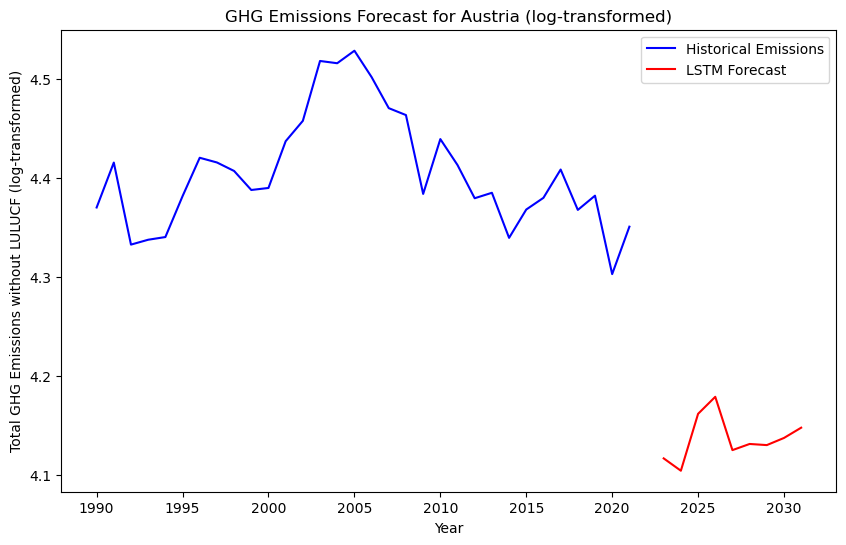

            LSTM Forecast
2022-12-31      61.374405
2023-12-31      60.615452
2024-12-31      64.195732
2025-12-31      65.307358
2026-12-31      61.888432
2027-12-31      62.273594
2028-12-31      62.202724
2029-12-31      62.652958
2030-12-31      63.304924


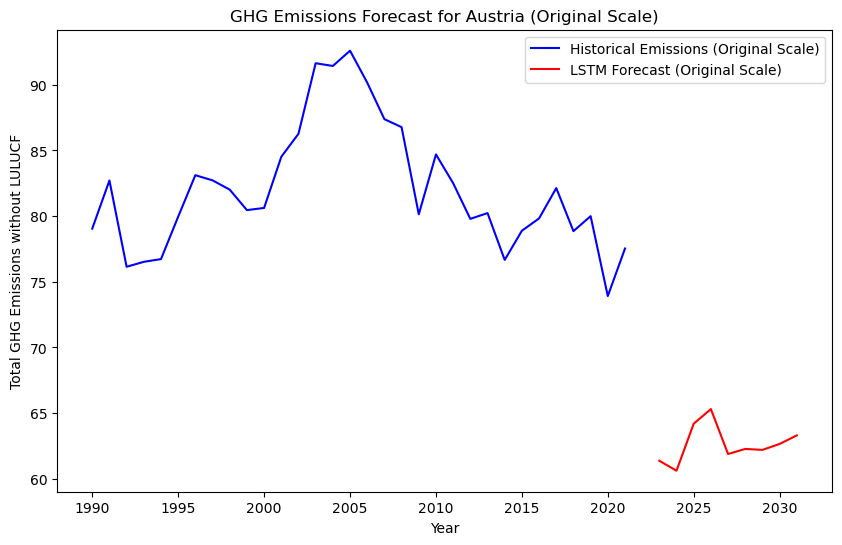

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Belgium (Fold 1):
MAE : 0.01996453801859488
MSE : 0.00057236751961051
RMSE : 0.023924203635868634
MAPE : 0.004093877519115369


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Belgium (Fold 2):
MAE : 0.10361981291364113
MSE : 0.011607397830545414
RMSE : 0.10773763423495716
MAPE : 0.02149342399160919


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Belgium (Fold 3):
MAE : 0.07858120705350984
MSE : 0.006714645753518469
RMSE : 0.08194294206042683
MAPE : 0.01648945434290608


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Belgium (Fold 4):
MAE : 0.11612424967769908
MSE : 0.014657834315550745
RMSE : 0.121069543302809
MAPE : 0.024372553708348798


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Belgium (Fold 5):
MAE : 0.039272615924480135
MSE : 0.0026449255013148184
RMSE : 0.051428839198593805
MAPE : 0.008352547283159486
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       4.346229
2023-12-31       4.391797
2024-12-31       4.422832
2025-12-31       4.294202
2026-12-31       4.330346
2027-12-31       4.299443
2028-12-31       4.306829
2029-12-31       4.311262
2030-12-31       4.330608


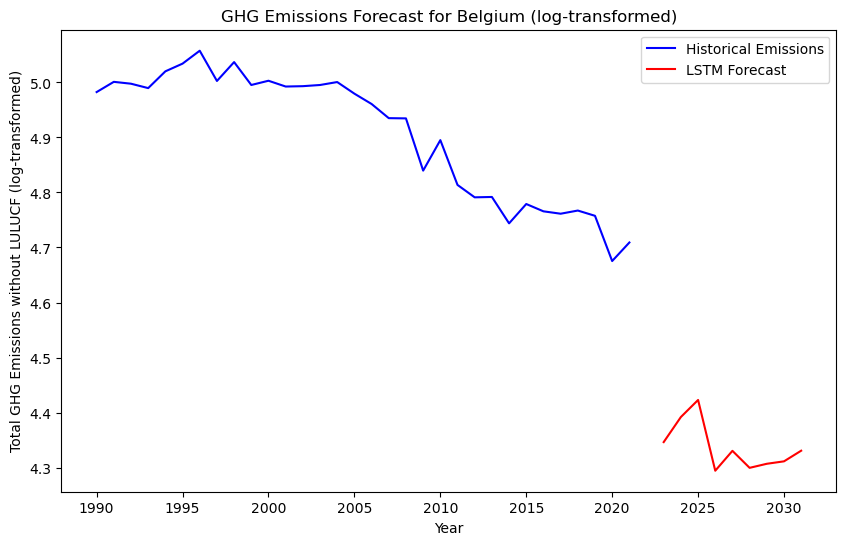

            LSTM Forecast
2022-12-31      77.186813
2023-12-31      80.785423
2024-12-31      83.331909
2025-12-31      73.273712
2026-12-31      75.970573
2027-12-31      73.658737
2028-12-31      74.204849
2029-12-31      74.534462
2030-12-31      75.990471


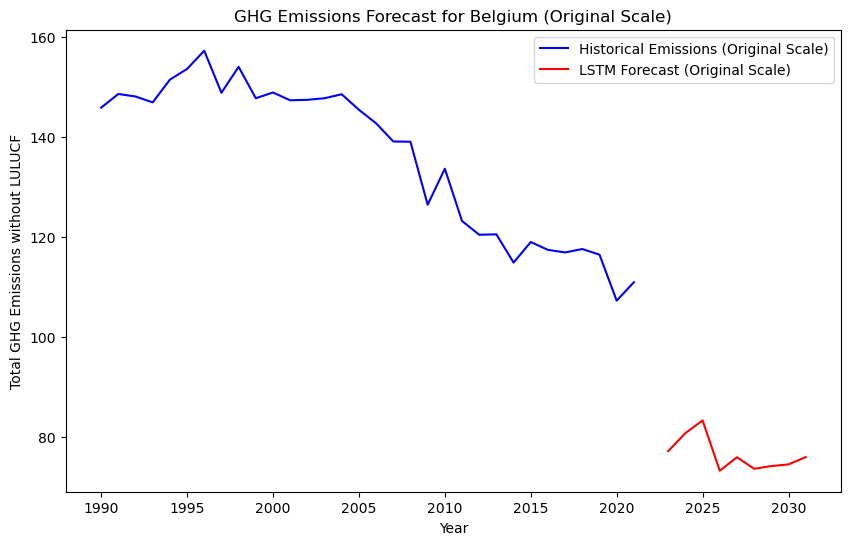

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Bulgaria (Fold 1):
MAE : 0.25250201824911106
MSE : 0.0642081253220465
RMSE : 0.2533932227231946
MAPE : 0.06088577198276573


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Bulgaria (Fold 2):
MAE : 0.48167451781210097
MSE : 0.24024989550015263
RMSE : 0.4901529307268831
MAPE : 0.11690480868033998


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Bulgaria (Fold 3):
MAE : 0.28156115432470763
MSE : 0.07969832663846403
RMSE : 0.2823089205789715
MAPE : 0.06948596020793302


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Bulgaria (Fold 4):
MAE : 0.06651493598901255
MSE : 0.004497678878441828
RMSE : 0.0670647364748556
MAPE : 0.0164027167800469


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Bulgaria (Fold 5):
MAE : 0.08052109782721084
MSE : 0.0074943368401669845
RMSE : 0.08656983793543213
MAPE : 0.0205070300524666
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       3.724288
2023-12-31       3.715295
2024-12-31       3.642388
2025-12-31       3.711965
2026-12-31       3.664228
2027-12-31       3.688338
2028-12-31       3.660680
2029-12-31       3.687892
2030-12-31       3.687817


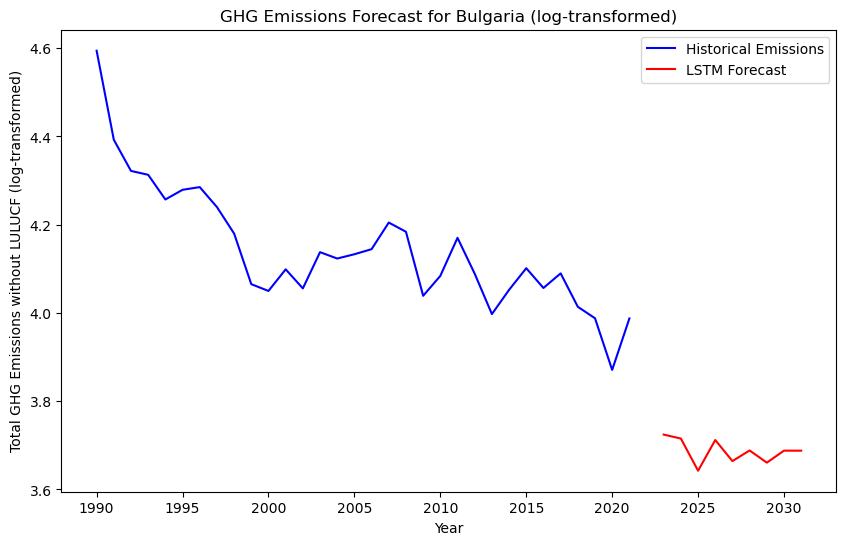

            LSTM Forecast
2022-12-31      41.441704
2023-12-31      41.070717
2024-12-31      38.182903
2025-12-31      40.934151
2026-12-31      39.025986
2027-12-31      39.978352
2028-12-31      38.887772
2029-12-31      39.960541
2030-12-31      39.957508


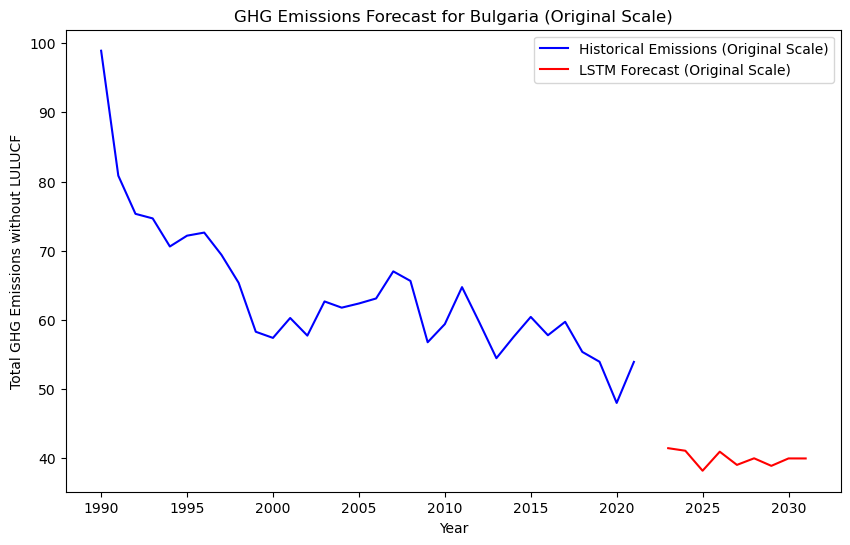

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Canada (Fold 1):
MAE : 0.2334324375024804
MSE : 0.06204781085332195
RMSE : 0.24909397996202548
MAPE : 0.03553097377791154


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Canada (Fold 2):
MAE : 0.3417830542815438
MSE : 0.11791905036189654
RMSE : 0.3433934337780741
MAPE : 0.052054850422554255


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Canada (Fold 3):
MAE : 0.4402794921272924
MSE : 0.19420390537290153
RMSE : 0.4406857217710843
MAPE : 0.06689033800061216


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Canada (Fold 4):
MAE : 0.07881392193675296
MSE : 0.006302684032652936
RMSE : 0.07938944534793613
MAPE : 0.01199727166140236


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Canada (Fold 5):
MAE : 0.15057718804189305
MSE : 0.023255870502756498
RMSE : 0.15249875574166663
MAPE : 0.023074499957928176
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       6.514010
2023-12-31       6.537798
2024-12-31       6.501746
2025-12-31       6.568141
2026-12-31       6.571867
2027-12-31       6.488161
2028-12-31       6.534146
2029-12-31       6.588436
2030-12-31       6.653102


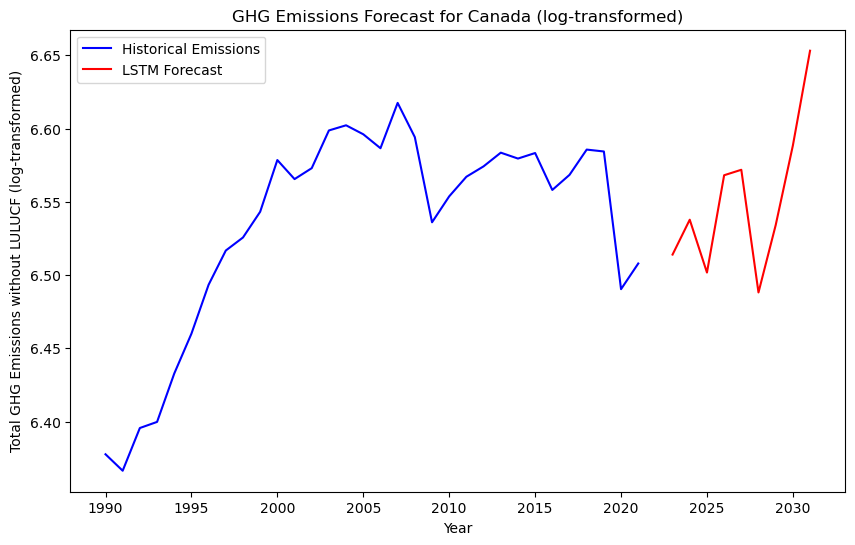

            LSTM Forecast
2022-12-31     674.525879
2023-12-31     690.763733
2024-12-31     666.304138
2025-12-31     712.045288
2026-12-31     714.702942
2027-12-31     657.313538
2028-12-31     688.245972
2029-12-31     726.643555
2030-12-31     775.185120


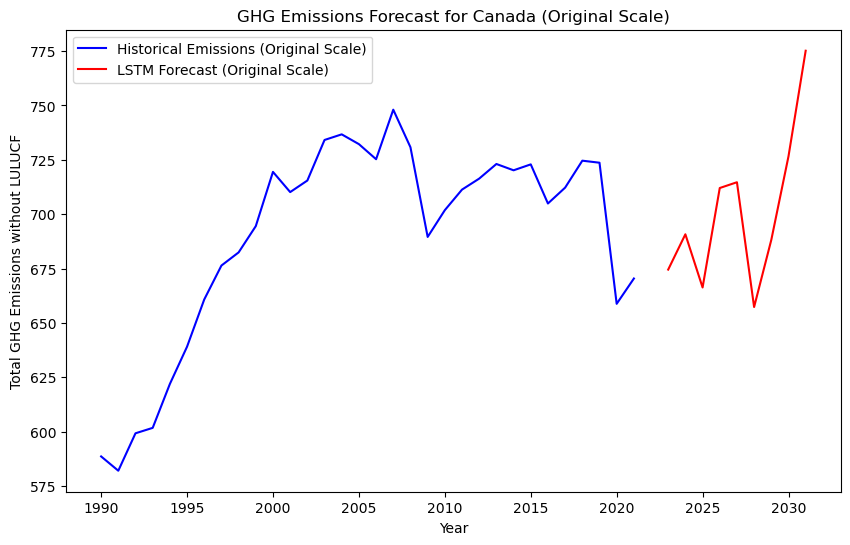

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Czechia (Fold 1):
MAE : 0.513408584964032
MSE : 0.2636369467805806
RMSE : 0.5134558859148277
MAPE : 0.10315354918581154


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Czechia (Fold 2):
MAE : 0.24731403723865006
MSE : 0.06296676639475943
RMSE : 0.2509317963008264
MAPE : 0.05018327058823956


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Metrics for Czechia (Fold 3):
MAE : 0.17031693714364682
MSE : 0.029020233120104485
RMSE : 0.17035325978713906
MAPE : 0.03508656137379946


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Czechia (Fold 4):
MAE : 0.19424599125687583
MSE : 0.03778899018659351
RMSE : 0.1943939047053521
MAPE : 0.03990190415668601


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Czechia (Fold 5):
MAE : 0.14532963547466662
MSE : 0.02280379938007816
RMSE : 0.15100926918596141
MAPE : 0.030438938379285158
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       4.270571
2023-12-31       4.336173
2024-12-31       4.328784
2025-12-31       4.287414
2026-12-31       4.268946
2027-12-31       4.323765
2028-12-31       4.263208
2029-12-31       4.206390
2030-12-31       4.266154


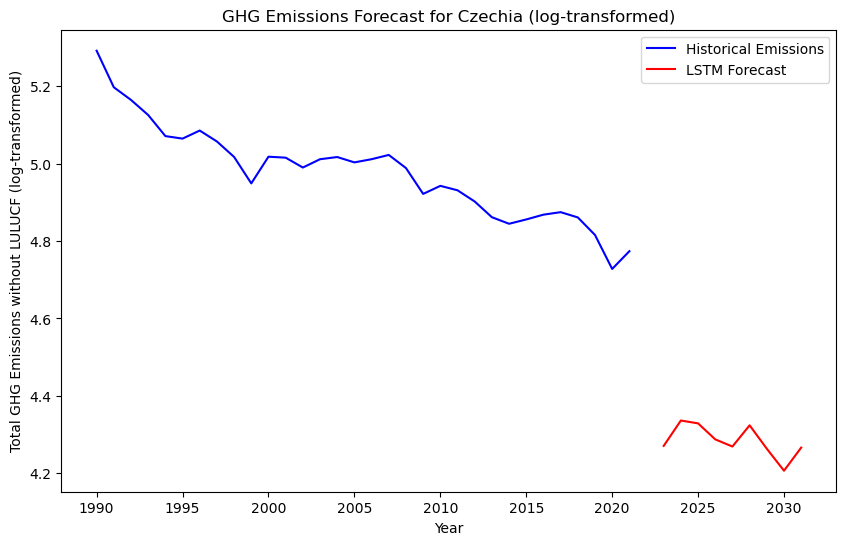

            LSTM Forecast
2022-12-31      71.562469
2023-12-31      76.414505
2024-12-31      75.851997
2025-12-31      72.777992
2026-12-31      71.446304
2027-12-31      75.472267
2028-12-31      71.037537
2029-12-31      67.113815
2030-12-31      71.247108


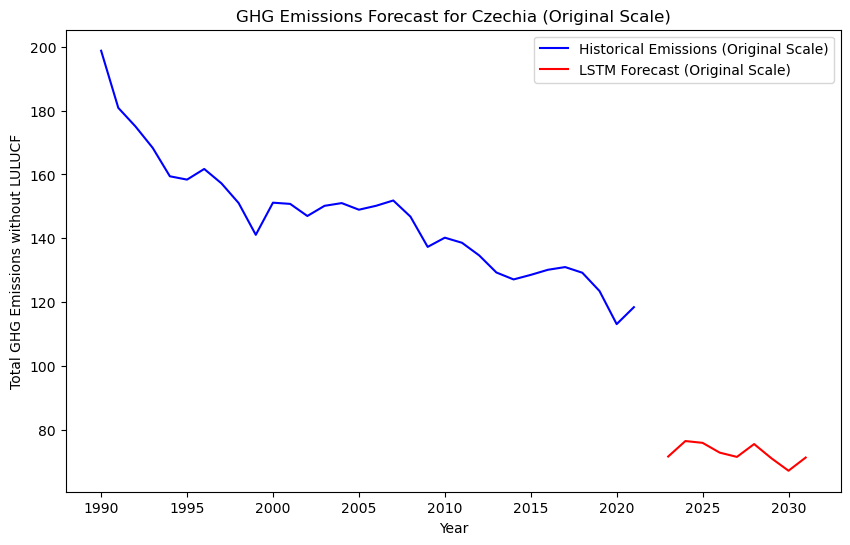

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Denmark (Fold 1):
MAE : 0.12031753836223687
MSE : 0.02194467508388712
RMSE : 0.1481373520888203
MAPE : 0.028419165984860658


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Denmark (Fold 2):
MAE : 0.04537318749052943
MSE : 0.002203664549666915
RMSE : 0.046943205575108685
MAPE : 0.011016419063089726


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Denmark (Fold 3):
MAE : 0.0687514971739982
MSE : 0.00620265892259032
RMSE : 0.07875696110560844
MAPE : 0.0173543562055241


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Denmark (Fold 4):
MAE : 0.03883193180507701
MSE : 0.0025576123702524107
RMSE : 0.05057284222042904
MAPE : 0.009882004826228937


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Denmark (Fold 5):
MAE : 0.04590776038972081
MSE : 0.0038907464144460817
RMSE : 0.0623758480058274
MAPE : 0.012012622633772146
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
            LSTM Forecast
2022-12-31       3.101033
2023-12-31       3.083052
2024-12-31       3.178412
2025-12-31       2.939208
2026-12-31       3.007348
2027-12-31       2.874600
2028-12-31       2.919067
2029-12-31       2.963912
2030-12-31       3.001359


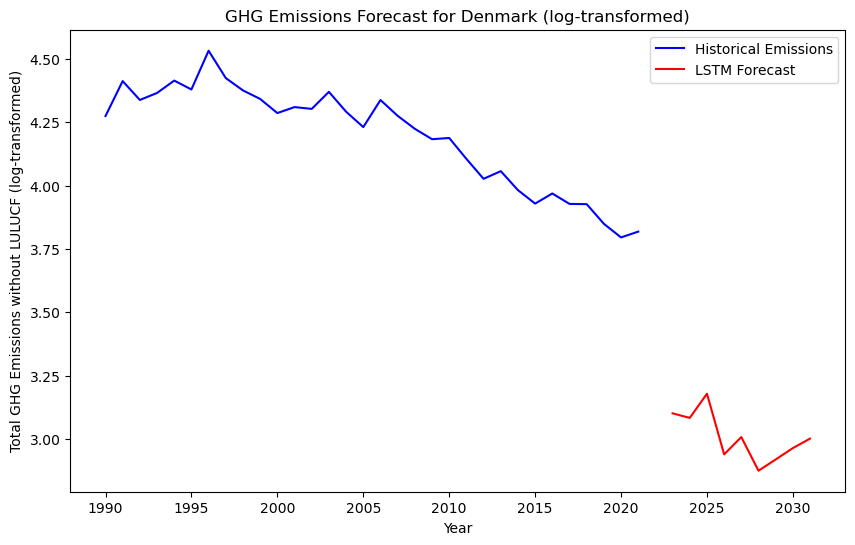

            LSTM Forecast
2022-12-31      22.220903
2023-12-31      21.824903
2024-12-31      24.008608
2025-12-31      18.900871
2026-12-31      20.233675
2027-12-31      17.718330
2028-12-31      18.523994
2029-12-31      19.373623
2030-12-31      20.112843


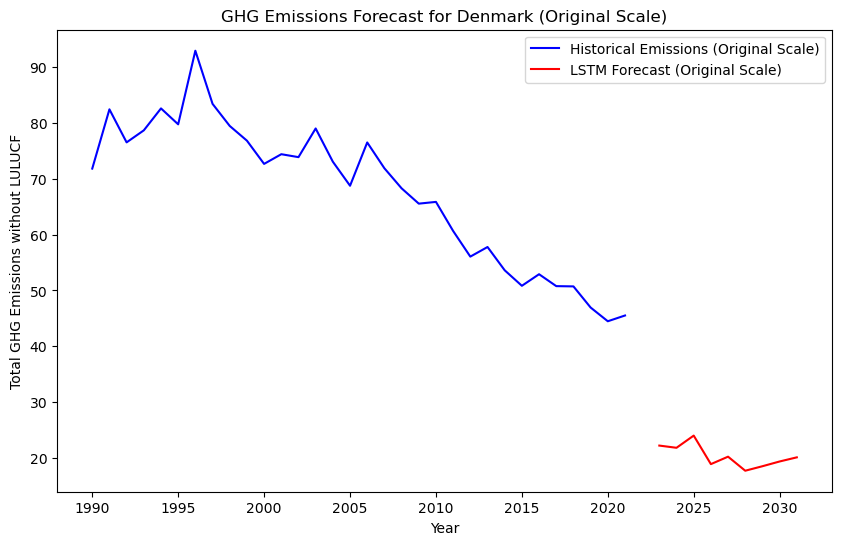

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Finland (Fold 1):
MAE : 0.250618919149467
MSE : 0.06931494492982032
RMSE : 0.2632773156385113
MAPE : 0.05874349058871953


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Metrics for Finland (Fold 2):
MAE : 0.14256191497099172
MSE : 0.031128303593374946
RMSE : 0.17643215011265648
MAPE : 0.0342170851909768


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
Metrics for Finland (Fold 3):
MAE : 0.5185433841790147
MSE : 0.2796915431436044
RMSE : 0.5288587175641566
MAPE : 0.12770565623271457


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Metrics for Finland (Fold 4):
MAE : 0.24621711824681144
MSE : 0.062381299300075514
RMSE : 0.24976248577413604
MAPE : 0.061080175181251924


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
Metrics for Finland (Fold 5):
MAE : 0.20735856528795216
MSE : 0.04336458166751316
RMSE : 0.20824164249139307
MAPE : 0.05312641856151801
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
            LSTM Forecast
2022-12-31       3.400648
2023-12-31       3.483765
2024-12-31       3.531211
2025-12-31       3.427574
2026-12-31       3.425205
2027-12-31       3.415346
2028-12-31       3.392807
2029-12-31       3.458902
2030-12-31       3.373522


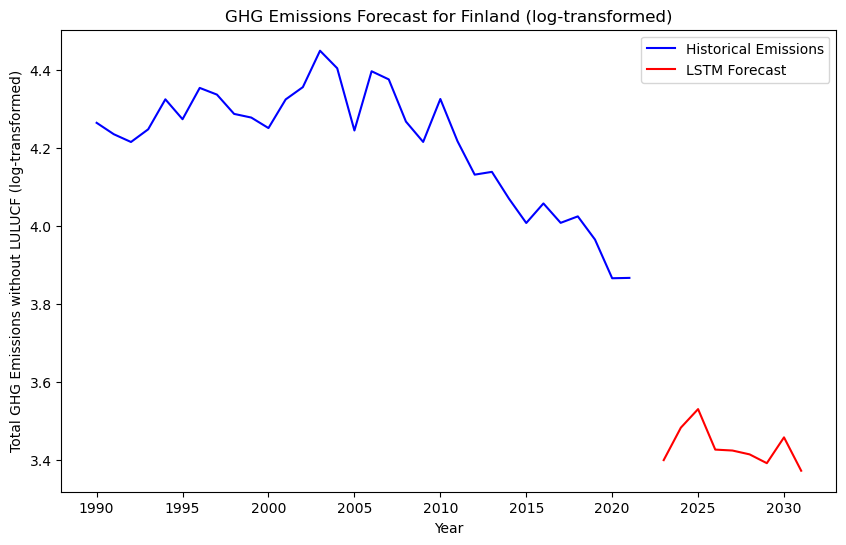

            LSTM Forecast
2022-12-31      29.983511
2023-12-31      32.582150
2024-12-31      34.165302
2025-12-31      30.801840
2026-12-31      30.728928
2027-12-31      30.427464
2028-12-31      29.749352
2029-12-31      31.782055
2030-12-31      29.181108


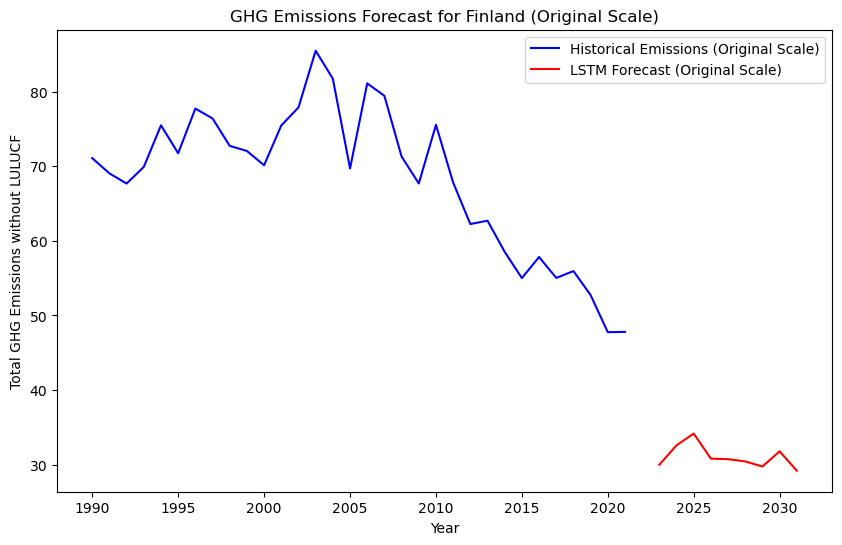

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for France (Fold 1):
MAE : 0.31753040297112073
MSE : 0.10269094145331052
RMSE : 0.32045427357629436
MAPE : 0.050754595004502


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Metrics for France (Fold 2):
MAE : 0.2418921386778005
MSE : 0.058668239228674986
RMSE : 0.24221527455690112
MAPE : 0.03899193406577256


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
Metrics for France (Fold 3):
MAE : 0.1685642484651758
MSE : 0.029506052637491783
RMSE : 0.17177325937843696
MAPE : 0.027440138452854385


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Metrics for France (Fold 4):
MAE : 0.026248877516906077
MSE : 0.0010226830988521154
RMSE : 0.031979416799749735
MAPE : 0.004289885801942495


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
Metrics for France (Fold 5):
MAE : 0.11116533905465549
MSE : 0.013862738131501769
RMSE : 0.11774012965638253
MAPE : 0.018384946361072838
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
            LSTM Forecast
2022-12-31       5.489500
2023-12-31       5.568033
2024-12-31       5.655756
2025-12-31       5.647090
2026-12-31       5.601174
2027-12-31       5.577604
2028-12-31       5.583234
2029-12-31       5.503767
2030-12-31       5.558910


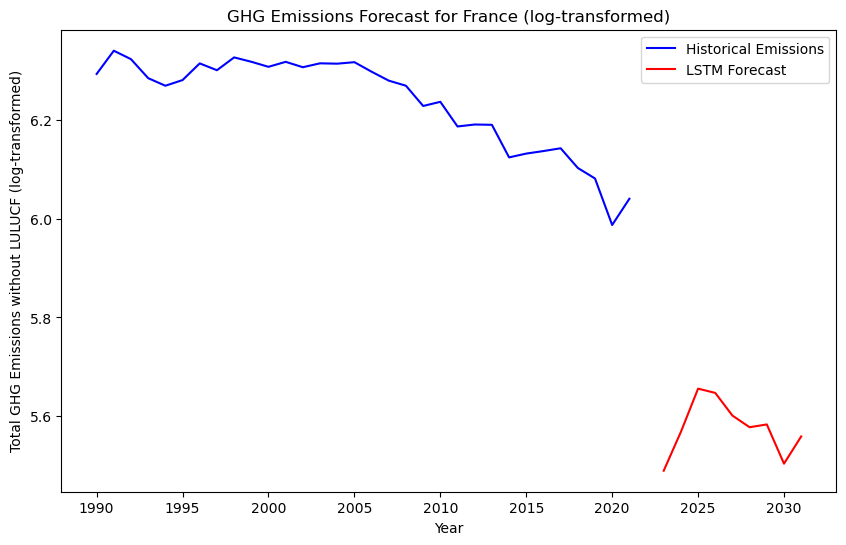

            LSTM Forecast
2022-12-31     242.136124
2023-12-31     261.918335
2024-12-31     285.932434
2025-12-31     283.465393
2026-12-31     270.744171
2027-12-31     264.437347
2028-12-31     265.930206
2029-12-31     245.615417
2030-12-31     259.539764


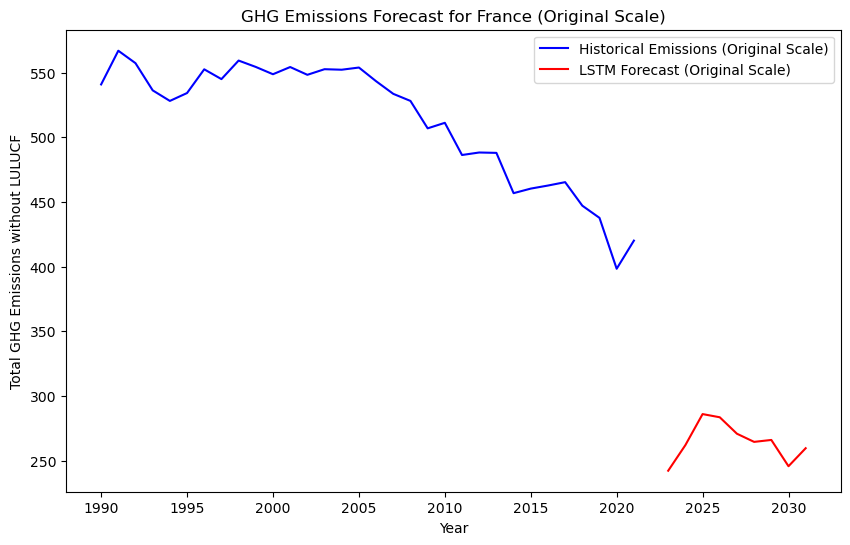

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Metrics for Germany (Fold 1):
MAE : 0.27611591086051934
MSE : 0.07634388860339868
RMSE : 0.27630397862390377
MAPE : 0.040313358059756915


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Metrics for Germany (Fold 2):
MAE : 0.2889033333228017
MSE : 0.08346689896805083
RMSE : 0.2889063844362925
MAPE : 0.04234957312342532


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Metrics for Germany (Fold 3):
MAE : 0.29486088062959287
MSE : 0.08714258994266688
RMSE : 0.29519923770678486
MAPE : 0.04329411154055696


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
Metrics for Germany (Fold 4):
MAE : 0.0828306768147297
MSE : 0.006986182972373835
RMSE : 0.08358338933289218
MAPE : 0.01222190696313571


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Metrics for Germany (Fold 5):
MAE : 0.12134475570084972
MSE : 0.016117913509367403
RMSE : 0.12695634489606025
MAPE : 0.018272467385107478
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
            LSTM Forecast
2022-12-31       6.253167
2023-12-31       6.240606
2024-12-31       6.214716
2025-12-31       6.241398
2026-12-31       6.220956
2027-12-31       6.208906
2028-12-31       6.234615
2029-12-31       6.226690
2030-12-31       6.180545


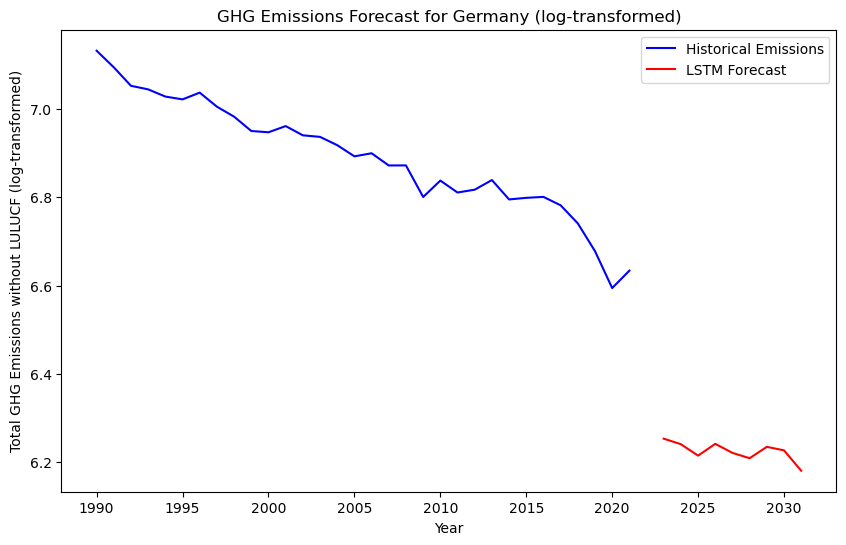

            LSTM Forecast
2022-12-31     519.656006
2023-12-31     513.169312
2024-12-31     500.054169
2025-12-31     513.575928
2026-12-31     503.184235
2027-12-31     497.157166
2028-12-31     510.104095
2029-12-31     506.077728
2030-12-31     483.255432


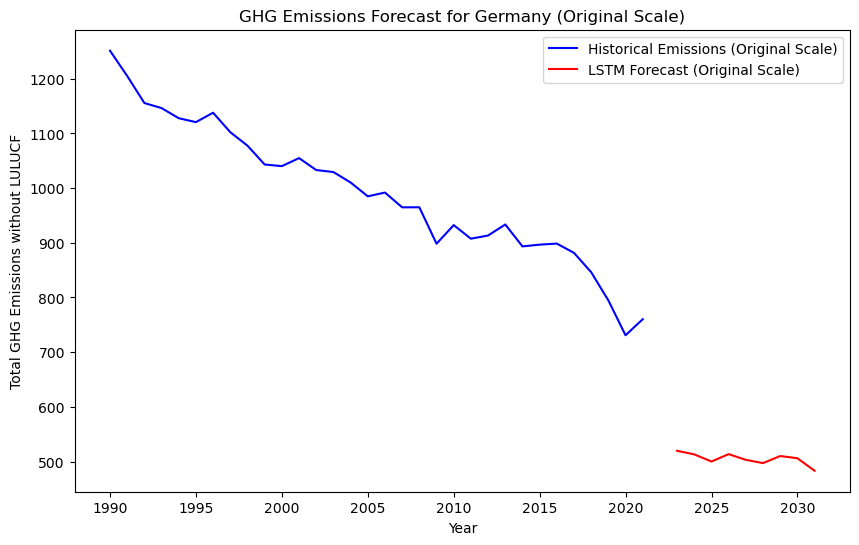

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
Metrics for Greece (Fold 1):
MAE : 0.1370664793833738
MSE : 0.03215822151302716
RMSE : 0.1793271354620576
MAPE : 0.028275148170002446


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
Metrics for Greece (Fold 2):
MAE : 0.49871630948170037
MSE : 0.25415550043453644
RMSE : 0.5041383742927495
MAPE : 0.10497576615691535


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Metrics for Greece (Fold 3):
MAE : 0.6559207664366683
MSE : 0.435324862613032
RMSE : 0.6597915296614772
MAPE : 0.14264872789913718


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Metrics for Greece (Fold 4):
MAE : 0.5561723003981793
MSE : 0.309405967861152
RMSE : 0.5562427238725483
MAPE : 0.12249967123642079


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Greece (Fold 5):
MAE : 0.45274382078229564
MSE : 0.2080121262367515
RMSE : 0.45608346411238315
MAPE : 0.10346704880966073
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
            LSTM Forecast
2022-12-31       3.968620
2023-12-31       3.956195
2024-12-31       3.955189
2025-12-31       3.998457
2026-12-31       4.038247
2027-12-31       3.993248
2028-12-31       3.952922
2029-12-31       3.939133
2030-12-31       3.853342


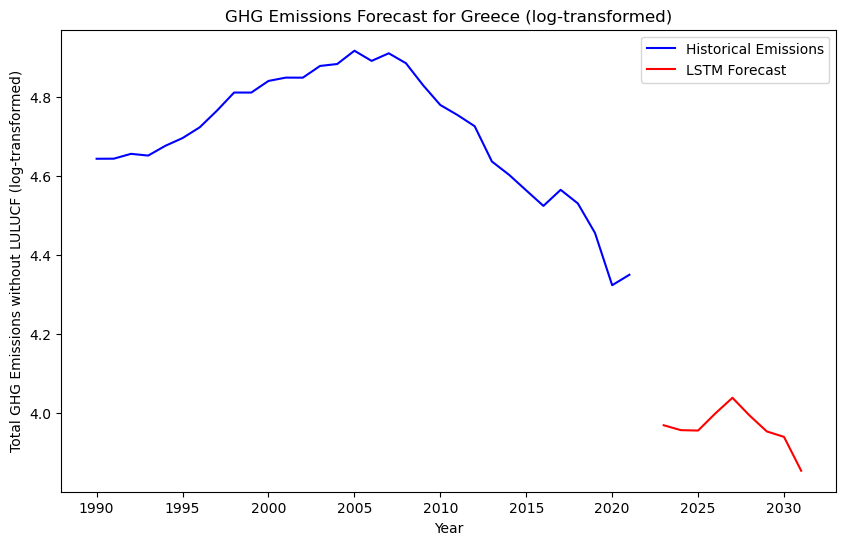

            LSTM Forecast
2022-12-31      52.911438
2023-12-31      52.258110
2024-12-31      52.205536
2025-12-31      54.513966
2026-12-31      56.726818
2027-12-31      54.230770
2028-12-31      52.087349
2029-12-31      51.374023
2030-12-31      47.150368


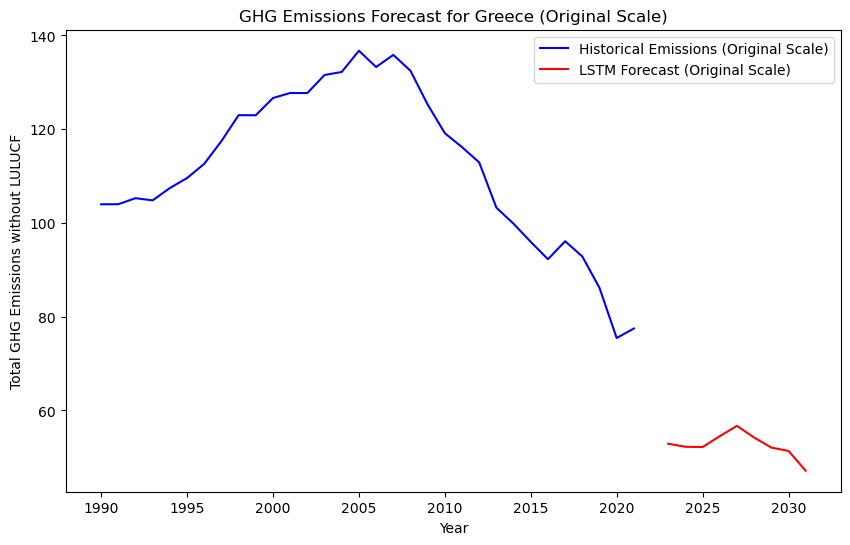

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Metrics for Ireland (Fold 1):
MAE : 0.23053490536654841
MSE : 0.07383747192359562
RMSE : 0.27173051342018184
MAPE : 0.05506815107357913


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Metrics for Ireland (Fold 2):
MAE : 0.8127399541096958
MSE : 0.6737410214577301
RMSE : 0.8208172887176111
MAPE : 0.19820900051198417


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Metrics for Ireland (Fold 3):
MAE : 0.4585007865792745
MSE : 0.21034714526430562
RMSE : 0.4586361796285871
MAPE : 0.11190215157538645


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Metrics for Ireland (Fold 4):
MAE : 0.23547721825848603
MSE : 0.055766993240911854
RMSE : 0.23615036150917038
MAPE : 0.056683756055960245


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Metrics for Ireland (Fold 5):
MAE : 0.1907741449920873
MSE : 0.046200550906321275
RMSE : 0.21494313412230984
MAPE : 0.04652813980881737
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
            LSTM Forecast
2022-12-31       3.982999
2023-12-31       3.988940
2024-12-31       3.958172
2025-12-31       4.003387
2026-12-31       4.028987
2027-12-31       4.037072
2028-12-31       3.951142
2029-12-31       3.995140
2030-12-31       3.958094


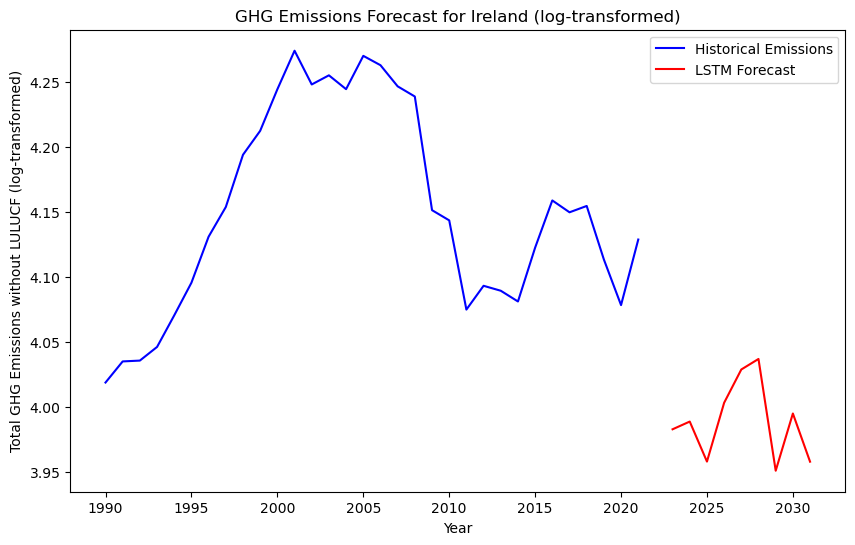

            LSTM Forecast
2022-12-31      53.677776
2023-12-31      53.997623
2024-12-31      52.361538
2025-12-31      54.783413
2026-12-31      56.203972
2027-12-31      56.660183
2028-12-31      51.994717
2029-12-31      54.333462
2030-12-31      52.357418


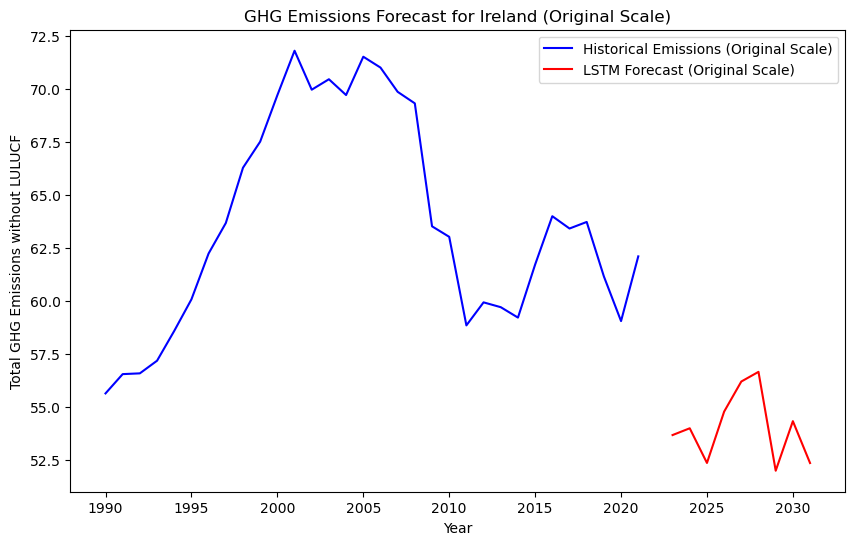

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Metrics for Italy (Fold 1):
MAE : 0.0966851249321552
MSE : 0.01495484278554733
RMSE : 0.12228999462567382
MAPE : 0.015418895173130198


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Metrics for Italy (Fold 2):
MAE : 0.25673086295685604
MSE : 0.06718002337439369
RMSE : 0.2591910943192179
MAPE : 0.04122205268619609


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Italy (Fold 3):
MAE : 0.14846438199819603
MSE : 0.02459771160041947
RMSE : 0.15683657609250296
MAPE : 0.024359299035689022


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
Metrics for Italy (Fold 4):
MAE : 0.16052239133166482
MSE : 0.025965507236925187
RMSE : 0.16113816195093322
MAPE : 0.02638982761974514


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Metrics for Italy (Fold 5):
MAE : 0.07479938927759437
MSE : 0.007726554912987551
RMSE : 0.08790082430209373
MAPE : 0.01242511071762697
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
            LSTM Forecast
2022-12-31       5.498850
2023-12-31       5.471855
2024-12-31       5.555888
2025-12-31       5.451673
2026-12-31       5.528348
2027-12-31       5.499713
2028-12-31       5.547284
2029-12-31       5.363989
2030-12-31       5.422843


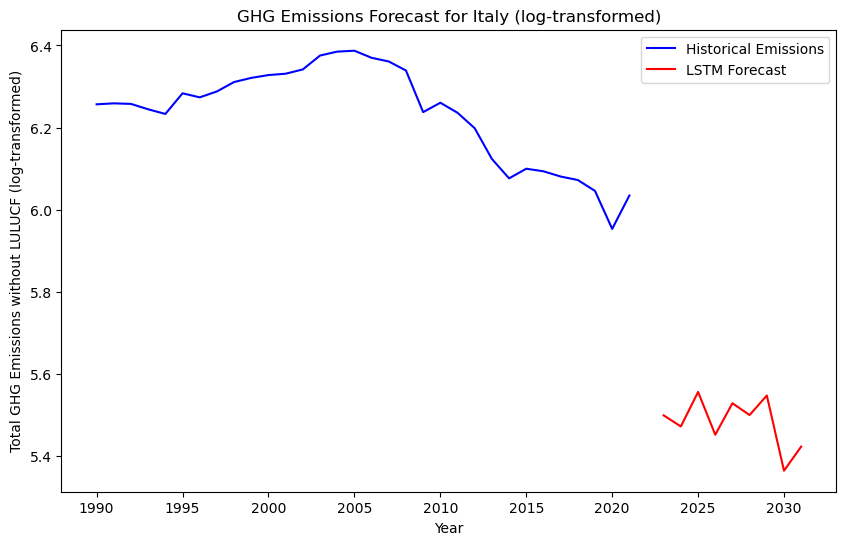

            LSTM Forecast
2022-12-31     244.410782
2023-12-31     237.901031
2024-12-31     258.756683
2025-12-31     233.147903
2026-12-31     251.727844
2027-12-31     244.621796
2028-12-31     256.539886
2029-12-31     213.575287
2030-12-31     226.522202


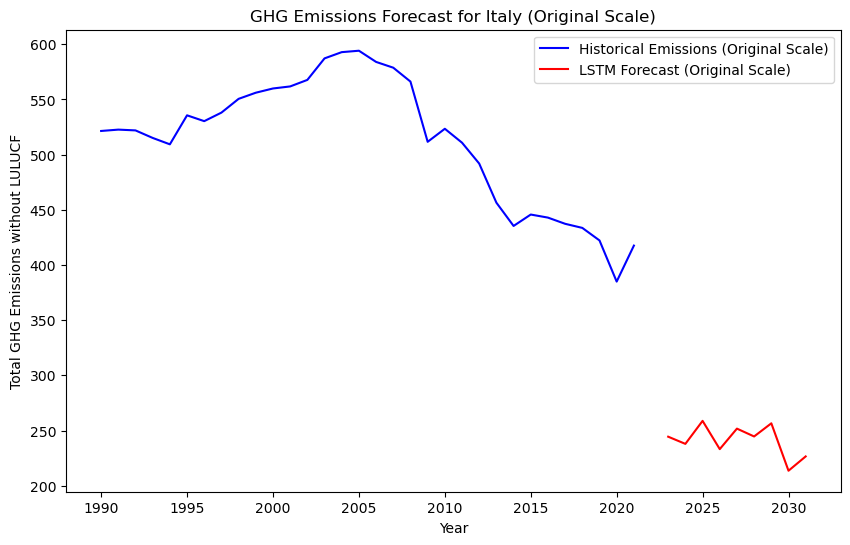

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Metrics for Japan (Fold 1):
MAE : 0.06198083230455135
MSE : 0.005403504969373346
RMSE : 0.07350853671087017
MAPE : 0.00859435551081032


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
Metrics for Japan (Fold 2):
MAE : 0.58354263863793
MSE : 0.34057211561930206
RMSE : 0.583585568378196
MAPE : 0.08097762770586171


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
Metrics for Japan (Fold 3):
MAE : 0.09973857130634715
MSE : 0.011795974545484464
RMSE : 0.1086092746752526
MAPE : 0.013802808530090494


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
Metrics for Japan (Fold 4):
MAE : 0.009786920381965677
MSE : 0.0001171671414600475
RMSE : 0.010824377185780599
MAPE : 0.0013670316031271057


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
Metrics for Japan (Fold 5):
MAE : 0.04940880802465042
MSE : 0.002644503083478898
RMSE : 0.05142473221591823
MAPE : 0.006988415962961189
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
            LSTM Forecast
2022-12-31       6.935659
2023-12-31       7.061863
2024-12-31       6.952278
2025-12-31       7.043979
2026-12-31       7.118988
2027-12-31       6.925969
2028-12-31       6.983149
2029-12-31       7.021208
2030-12-31       6.942137


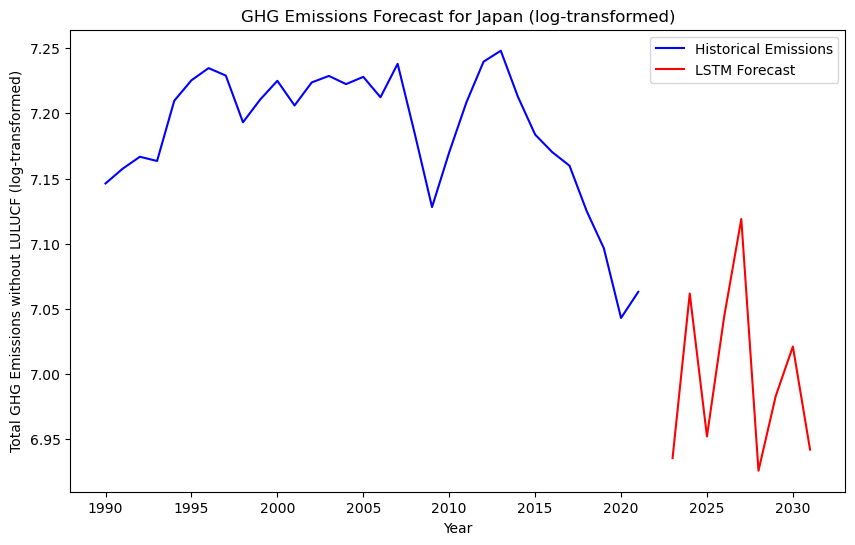

            LSTM Forecast
2022-12-31    1028.296509
2023-12-31    1166.616455
2024-12-31    1045.528931
2025-12-31    1145.938477
2026-12-31    1235.199219
2027-12-31    1018.380249
2028-12-31    1078.308228
2029-12-31    1120.139282
2030-12-31    1034.979858


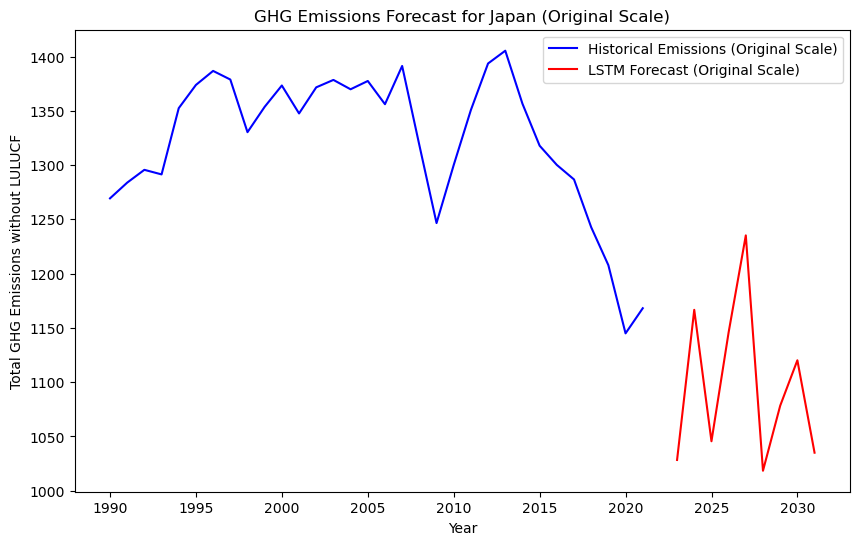

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Metrics for Kazakhstan (Fold 1):
MAE : 0.601068256562816
MSE : 0.36429957304080296
RMSE : 0.6035723428395332
MAPE : 0.10541381361502099


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Metrics for Kazakhstan (Fold 2):
MAE : 0.6686570495670635
MSE : 0.44975966092916586
RMSE : 0.6706412311580356
MAPE : 0.11649409028263309


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
Metrics for Kazakhstan (Fold 3):
MAE : 0.26745494239890366
MSE : 0.0769380754112161
RMSE : 0.2773771357037492
MAPE : 0.04603618159354652


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Metrics for Kazakhstan (Fold 4):
MAE : 0.020349614507895037
MSE : 0.0005732618711619272
RMSE : 0.023942887694719014
MAPE : 0.0034625896622102006


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Metrics for Kazakhstan (Fold 5):
MAE : 0.15506270497924066
MSE : 0.025026095643380847
RMSE : 0.15819638315518103
MAPE : 0.026602408064037505
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
            LSTM Forecast
2022-12-31       6.175942
2023-12-31       6.209060
2024-12-31       6.165791
2025-12-31       6.413845
2026-12-31       6.163472
2027-12-31       6.333795
2028-12-31       6.317625
2029-12-31       6.197272
2030-12-31       6.356508


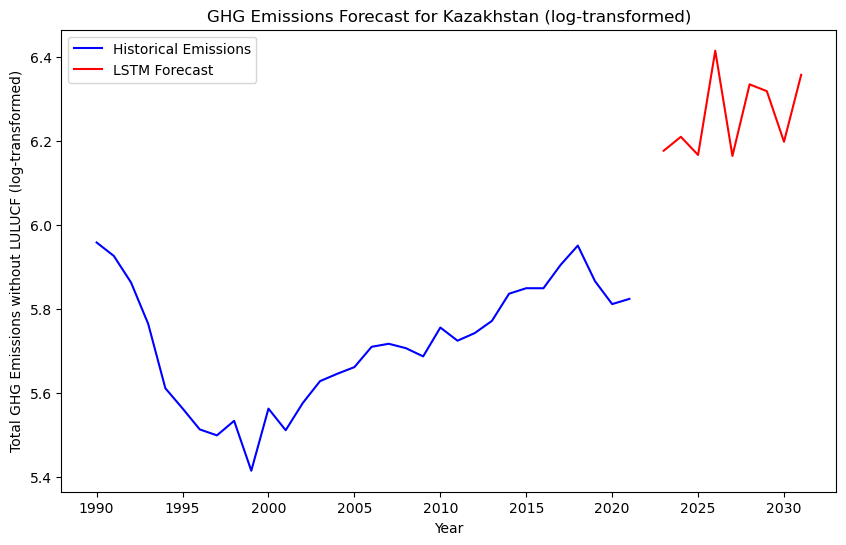

            LSTM Forecast
2022-12-31     481.036163
2023-12-31     497.233490
2024-12-31     476.177673
2025-12-31     610.235596
2026-12-31     475.074554
2027-12-31     563.290222
2028-12-31     554.255127
2029-12-31     491.406555
2030-12-31     576.230774


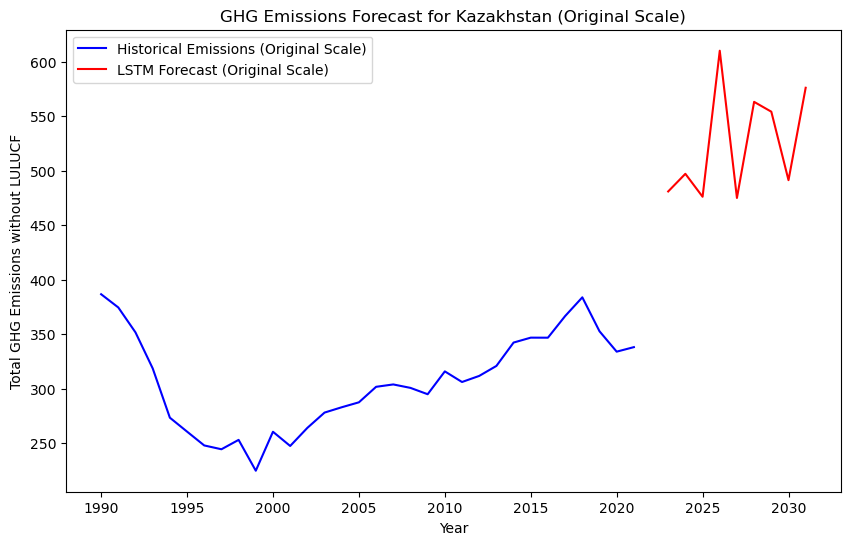

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Metrics for Luxembourg (Fold 1):
MAE : 0.5300522988935686
MSE : 0.2820681998763039
RMSE : 0.5311009319105964
MAPE : 0.21360324740578984


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Metrics for Luxembourg (Fold 2):
MAE : 0.25459959241458324
MSE : 0.07077911708810929
RMSE : 0.26604344962451015
MAPE : 0.10230695630076166


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Metrics for Luxembourg (Fold 3):
MAE : 0.18431491811397857
MSE : 0.050245833816860465
RMSE : 0.22415582485597038
MAPE : 0.07834291314721768


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Metrics for Luxembourg (Fold 4):
MAE : 0.36685616229803647
MSE : 0.13589448014897507
RMSE : 0.36863868509554865
MAPE : 0.157452884263144


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Metrics for Luxembourg (Fold 5):
MAE : 0.2745121743513537
MSE : 0.08004518040208262
RMSE : 0.2829225696230024
MAPE : 0.1219491351804524
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
            LSTM Forecast
2022-12-31       2.322706
2023-12-31       2.332314
2024-12-31       2.340632
2025-12-31       2.323521
2026-12-31       2.351352
2027-12-31       2.376905
2028-12-31       2.376278
2029-12-31       2.389593
2030-12-31       2.373567


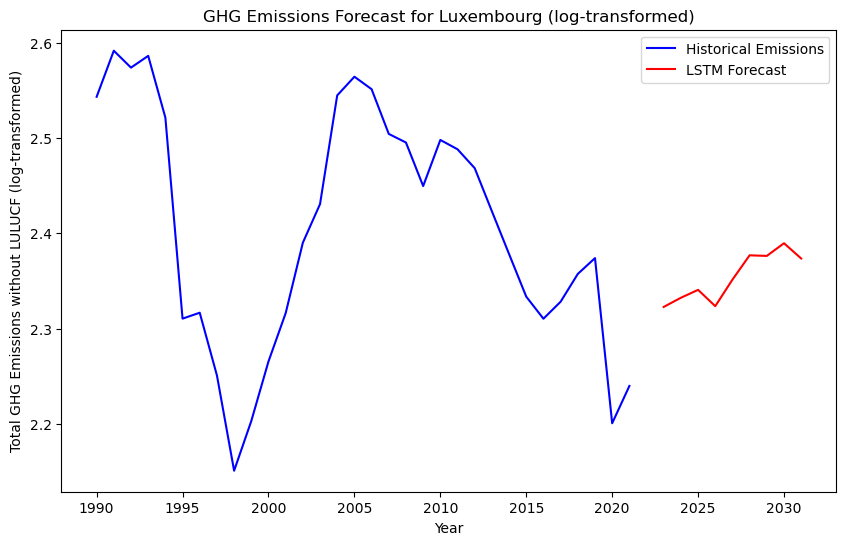

            LSTM Forecast
2022-12-31      10.203252
2023-12-31      10.301755
2024-12-31      10.387797
2025-12-31      10.211565
2026-12-31      10.499761
2027-12-31      10.771519
2028-12-31      10.764761
2029-12-31      10.909050
2030-12-31      10.735620


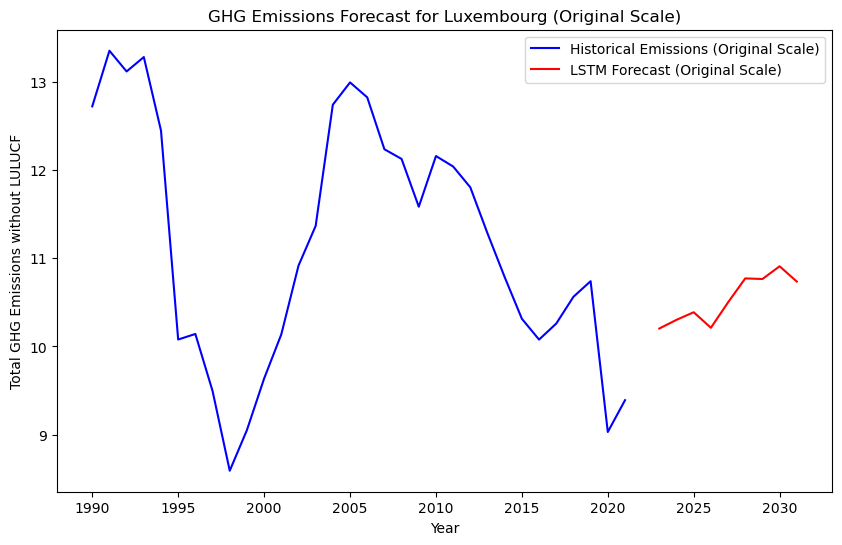

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Metrics for New Zealand (Fold 1):
MAE : 0.3806441610025904
MSE : 0.15608595679873483
RMSE : 0.39507715296981527
MAPE : 0.08731702622337845


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Metrics for New Zealand (Fold 2):
MAE : 0.37516312508635785
MSE : 0.14673706262990782
RMSE : 0.38306273980890887
MAPE : 0.0861206799137688


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Metrics for New Zealand (Fold 3):
MAE : 0.5442048114977078
MSE : 0.298138627736487
RMSE : 0.5460207209772235
MAPE : 0.12458126563378796


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Metrics for New Zealand (Fold 4):
MAE : 0.47954495172215533
MSE : 0.2301855307730485
RMSE : 0.4797765425414716
MAPE : 0.11004281158544453


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for New Zealand (Fold 5):
MAE : 0.20668866382935866
MSE : 0.04395005548112781
RMSE : 0.20964268525547897
MAPE : 0.04742089921756878
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
            LSTM Forecast
2022-12-31       4.521691
2023-12-31       4.479185
2024-12-31       4.484038
2025-12-31       4.573224
2026-12-31       4.497979
2027-12-31       4.458049
2028-12-31       4.533720
2029-12-31       4.581777
2030-12-31       4.532877


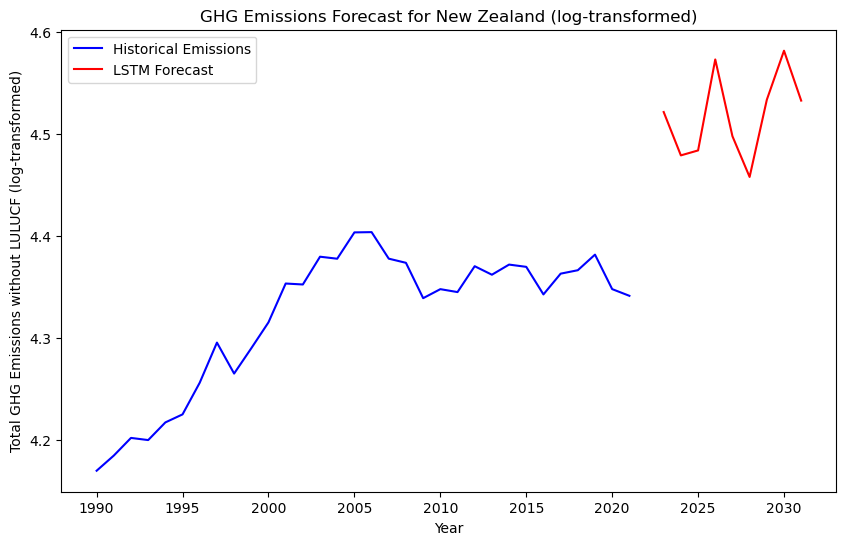

            LSTM Forecast
2022-12-31      91.991051
2023-12-31      88.162804
2024-12-31      88.591675
2025-12-31      96.855873
2026-12-31      89.835411
2027-12-31      86.318916
2028-12-31      93.104218
2029-12-31      97.687782
2030-12-31      93.025810


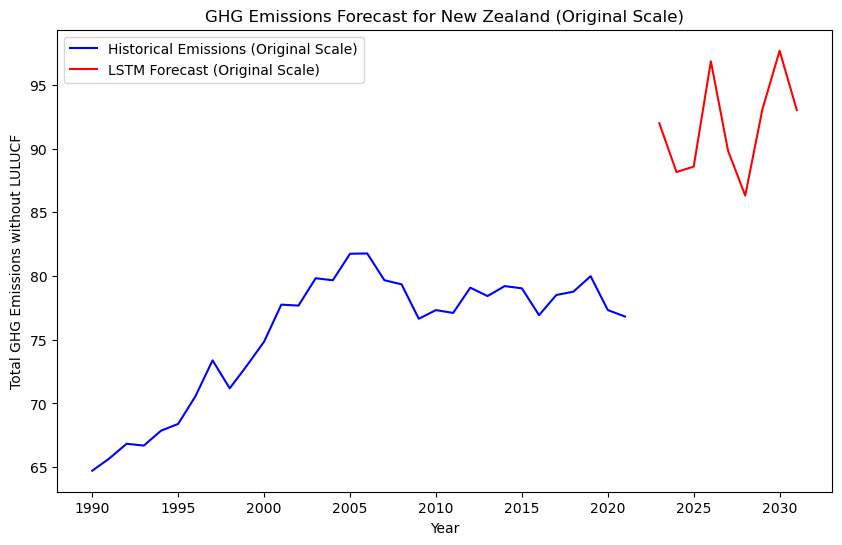

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Metrics for Norway (Fold 1):
MAE : 0.2938843251981041
MSE : 0.09261128155724178
RMSE : 0.3043210172782054
MAPE : 0.07361885614392388


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Metrics for Norway (Fold 2):
MAE : 0.10335373647772601
MSE : 0.01154638690107084
RMSE : 0.10745411532868734
MAPE : 0.02591973421972424


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Metrics for Norway (Fold 3):
MAE : 0.30694262228593966
MSE : 0.09450047366034064
RMSE : 0.3074092933864242
MAPE : 0.07695573804690121


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Metrics for Norway (Fold 4):
MAE : 0.2515340650036359
MSE : 0.0642132459518888
RMSE : 0.2534033266393494
MAPE : 0.06338229506629245


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Metrics for Norway (Fold 5):
MAE : 0.5013142660688117
MSE : 0.2515523691176201
RMSE : 0.5015499667207846
MAPE : 0.12837252174089286
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
            LSTM Forecast
2022-12-31       4.169887
2023-12-31       4.185313
2024-12-31       4.173969
2025-12-31       4.208049
2026-12-31       4.189097
2027-12-31       4.190869
2028-12-31       4.194187
2029-12-31       4.212467
2030-12-31       4.250987


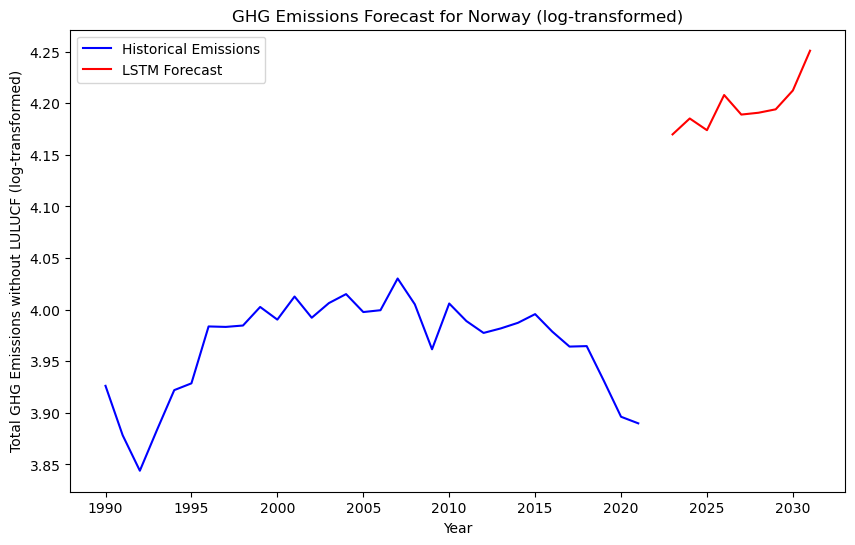

            LSTM Forecast
2022-12-31      64.708115
2023-12-31      65.714088
2024-12-31      64.972801
2025-12-31      67.225281
2026-12-31      65.963226
2027-12-31      66.080185
2028-12-31      66.299812
2029-12-31      67.522934
2030-12-31      70.174614


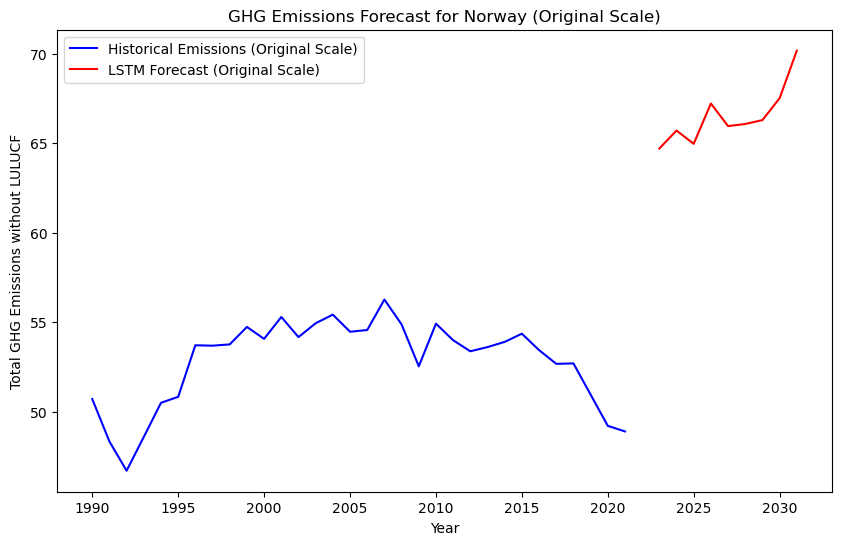

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Metrics for Poland (Fold 1):
MAE : 0.2725582231222366
MSE : 0.07490531538586241
RMSE : 0.27368835449441836
MAPE : 0.04543418094844629


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Metrics for Poland (Fold 2):
MAE : 0.3115615349113643
MSE : 0.09816268220013262
RMSE : 0.3133092437195759
MAPE : 0.051930694982769456


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
Metrics for Poland (Fold 3):
MAE : 0.2645820692848965
MSE : 0.07101410145227856
RMSE : 0.2664847114794366
MAPE : 0.04441297979638737


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Metrics for Poland (Fold 4):
MAE : 0.2633609357440472
MSE : 0.0694433220450061
RMSE : 0.2635210087355581
MAPE : 0.04388177415339586


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Metrics for Poland (Fold 5):
MAE : 0.03611726646535196
MSE : 0.0013879483617657603
RMSE : 0.03725517899253419
MAPE : 0.006072618722581469
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
            LSTM Forecast
2022-12-31       5.892815
2023-12-31       5.858028
2024-12-31       5.998302
2025-12-31       5.883603
2026-12-31       5.781918
2027-12-31       5.781600
2028-12-31       5.861890
2029-12-31       5.882102
2030-12-31       5.936230


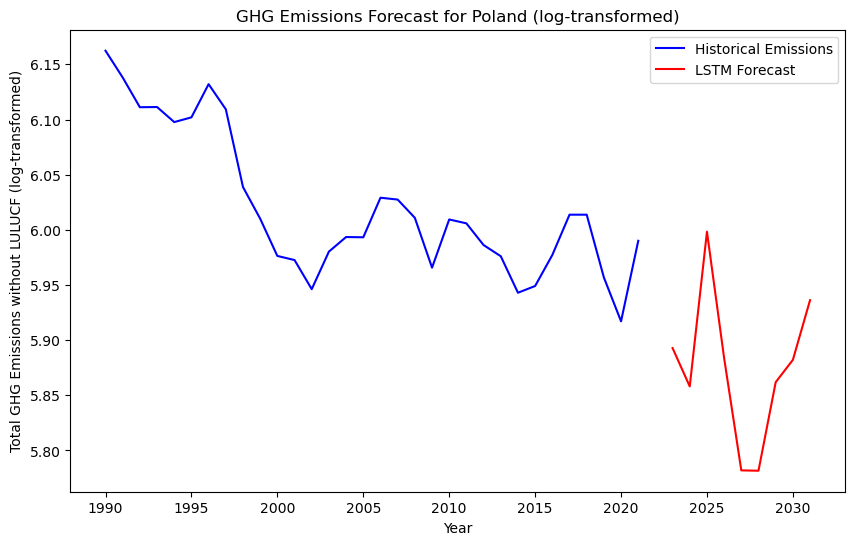

            LSTM Forecast
2022-12-31     362.423920
2023-12-31     350.033173
2024-12-31     402.744568
2025-12-31     359.100647
2026-12-31     324.380615
2027-12-31     324.277802
2028-12-31     351.387756
2029-12-31     358.562347
2030-12-31     378.505310


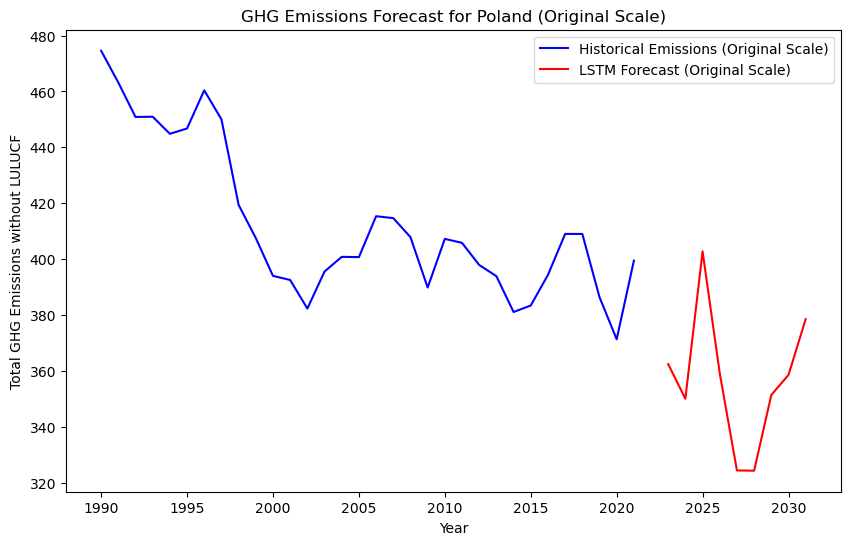

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
Metrics for Portugal (Fold 1):
MAE : 0.4423166688925262
MSE : 0.21150972520121
RMSE : 0.45990186475074224
MAPE : 0.10213125698490684


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Metrics for Portugal (Fold 2):
MAE : 0.7783161560092351
MSE : 0.6140342387802968
RMSE : 0.7836033682803417
MAPE : 0.18463526688031226


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Metrics for Portugal (Fold 3):
MAE : 0.5066348427267355
MSE : 0.2588497562754081
RMSE : 0.5087727943546196
MAPE : 0.1212565748313868


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Metrics for Portugal (Fold 4):
MAE : 0.37314248351476237
MSE : 0.14483157516197306
RMSE : 0.3805674383890102
MAPE : 0.08833960759529413


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Metrics for Portugal (Fold 5):
MAE : 0.25285873916718327
MSE : 0.06442655323251285
RMSE : 0.2538238626144375
MAPE : 0.061896195728399384
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
            LSTM Forecast
2022-12-31       3.999823
2023-12-31       4.062233
2024-12-31       4.025957
2025-12-31       4.053333
2026-12-31       4.033950
2027-12-31       4.056264
2028-12-31       4.022126
2029-12-31       4.021439
2030-12-31       4.012352


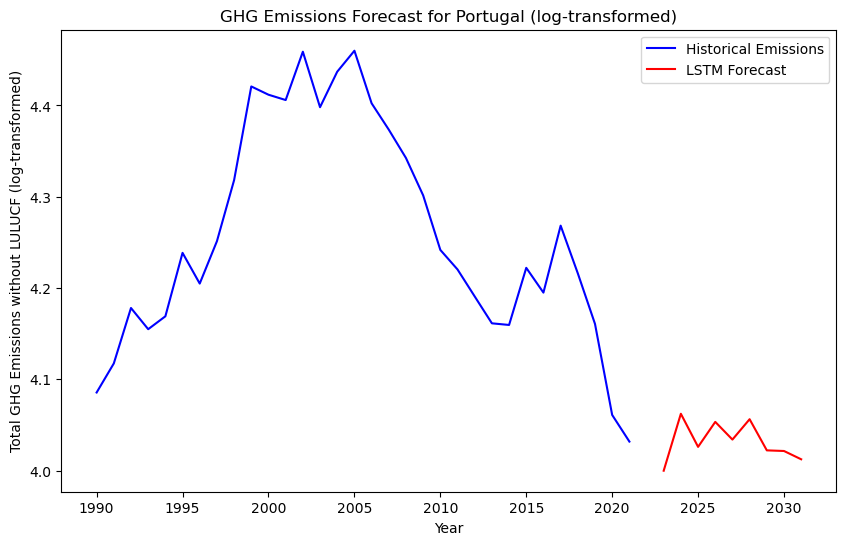

            LSTM Forecast
2022-12-31      54.588490
2023-12-31      58.103935
2024-12-31      56.033886
2025-12-31      57.589096
2026-12-31      56.483604
2027-12-31      57.758118
2028-12-31      55.819660
2029-12-31      55.781326
2030-12-31      55.276730


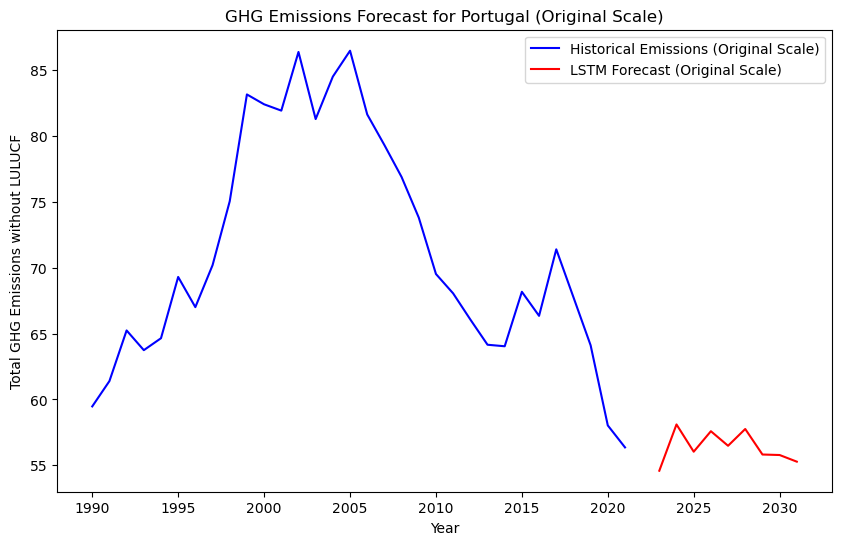

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Metrics for Romania (Fold 1):
MAE : 0.2510007642505627
MSE : 0.06306450663903873
RMSE : 0.25112647538449373
MAPE : 0.05034818107478481


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Metrics for Romania (Fold 2):
MAE : 0.4152762854851
MSE : 0.18194029519933916
RMSE : 0.4265445993086059
MAPE : 0.08523658940320733


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Romania (Fold 3):
MAE : 0.28107999883318485
MSE : 0.07932040271289988
RMSE : 0.2816387805556967
MAPE : 0.0589128116398536


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Metrics for Romania (Fold 4):
MAE : 0.23127576601919073
MSE : 0.05355643831438268
RMSE : 0.23142264002120164
MAPE : 0.0485087223060916


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Metrics for Romania (Fold 5):
MAE : 0.17528290014555795
MSE : 0.03747695362157711
RMSE : 0.19358965267177144
MAPE : 0.036971572572757384
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
            LSTM Forecast
2022-12-31       4.171383
2023-12-31       4.163812
2024-12-31       4.322337
2025-12-31       4.135302
2026-12-31       4.152559
2027-12-31       4.142965
2028-12-31       4.091037
2029-12-31       4.128873
2030-12-31       4.212362


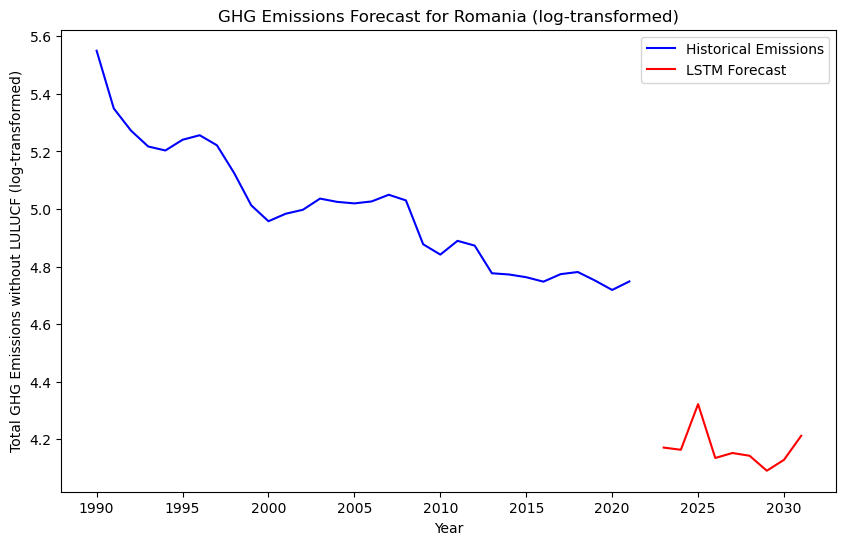

            LSTM Forecast
2022-12-31      64.805038
2023-12-31      64.316246
2024-12-31      75.364563
2025-12-31      62.508442
2026-12-31      63.596523
2027-12-31      62.989326
2028-12-31      59.801861
2029-12-31      62.107880
2030-12-31      67.515808


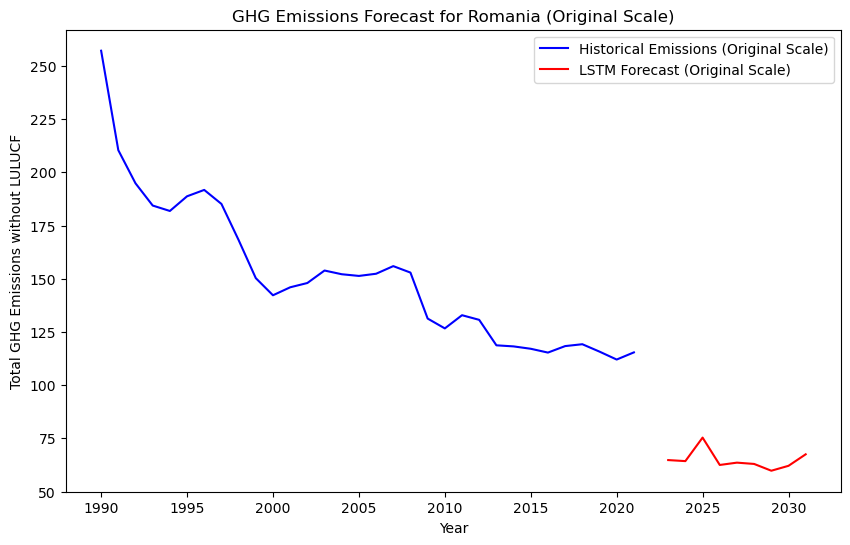

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
Metrics for Russian Federation (Fold 1):
MAE : 0.5064219803679931
MSE : 0.2579516358834617
RMSE : 0.507889393355937
MAPE : 0.06661683735994299


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Metrics for Russian Federation (Fold 2):
MAE : 0.5814739922239873
MSE : 0.33828797439288305
RMSE : 0.5816252869269725
MAPE : 0.0761758111383401


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Metrics for Russian Federation (Fold 3):
MAE : 0.5546729742552863
MSE : 0.3078647582895951
RMSE : 0.5548556193187513
MAPE : 0.07279589148976158


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Russian Federation (Fold 4):
MAE : 0.27308790815549067
MSE : 0.07458373766575338
RMSE : 0.2731002337343441
MAPE : 0.03572955633130903


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Russian Federation (Fold 5):
MAE : 0.23685603142927025
MSE : 0.056842206204930634
RMSE : 0.2384160359643005
MAPE : 0.03092073475752886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
            LSTM Forecast
2022-12-31       7.489607
2023-12-31       7.440941
2024-12-31       7.512947
2025-12-31       7.536428
2026-12-31       7.527042
2027-12-31       7.445847
2028-12-31       7.497236
2029-12-31       7.537041
2030-12-31       7.475242


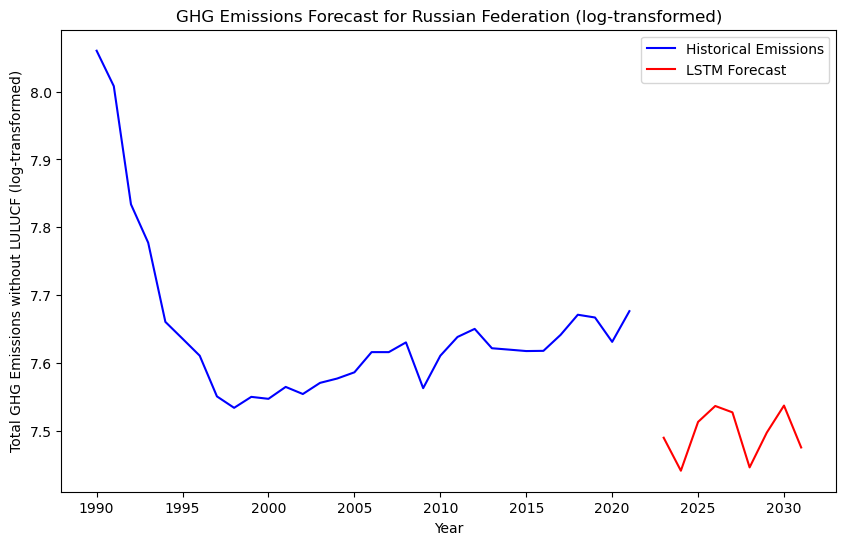

            LSTM Forecast
2022-12-31    1789.349365
2023-12-31    1704.353760
2024-12-31    1831.603516
2025-12-31    1875.119995
2026-12-31    1857.602417
2027-12-31    1712.734619
2028-12-31    1803.052124
2029-12-31    1876.270142
2030-12-31    1763.828735


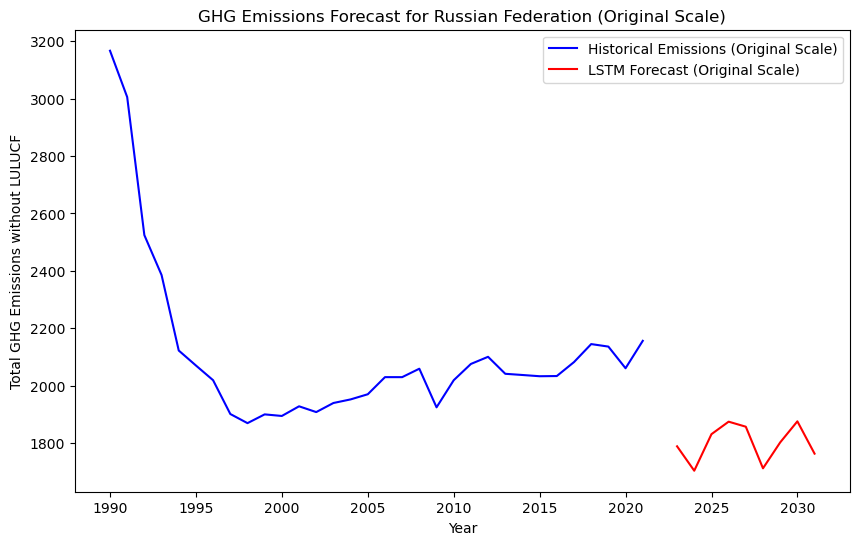

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
Metrics for Slovakia (Fold 1):
MAE : 0.28152034511011426
MSE : 0.07995573480671168
RMSE : 0.28276445110146303
MAPE : 0.07282707310482245


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
Metrics for Slovakia (Fold 2):
MAE : 0.19653723963203337
MSE : 0.03899972765556766
RMSE : 0.19748348704529112
MAPE : 0.051797833494618285


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Metrics for Slovakia (Fold 3):
MAE : 0.29716335321981563
MSE : 0.08832540259403271
RMSE : 0.29719589935601853
MAPE : 0.08000685120056046


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Metrics for Slovakia (Fold 4):
MAE : 0.19789220407769412
MSE : 0.040281388135463045
RMSE : 0.20070223749490948
MAPE : 0.052922986569250326


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Metrics for Slovakia (Fold 5):
MAE : 0.2185842414525633
MSE : 0.05415888260527394
RMSE : 0.2327206106155489
MAPE : 0.059281104002372055
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
            LSTM Forecast
2022-12-31       3.245427
2023-12-31       3.269296
2024-12-31       3.162303
2025-12-31       3.175442
2026-12-31       3.194586
2027-12-31       3.166731
2028-12-31       3.176073
2029-12-31       3.046489
2030-12-31       3.080382


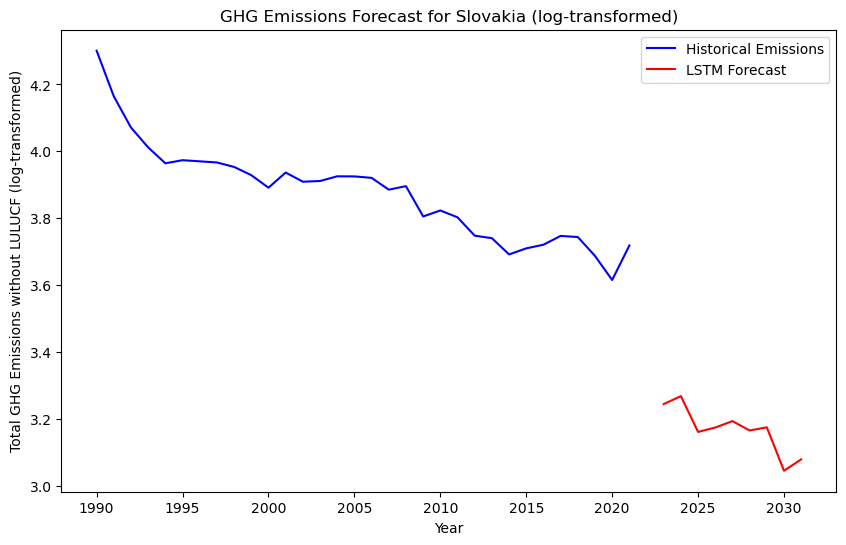

            LSTM Forecast
2022-12-31      25.672680
2023-12-31      26.292822
2024-12-31      23.624945
2025-12-31      23.937389
2026-12-31      24.400070
2027-12-31      23.729774
2028-12-31      23.952497
2029-12-31      21.041338
2030-12-31      21.766708


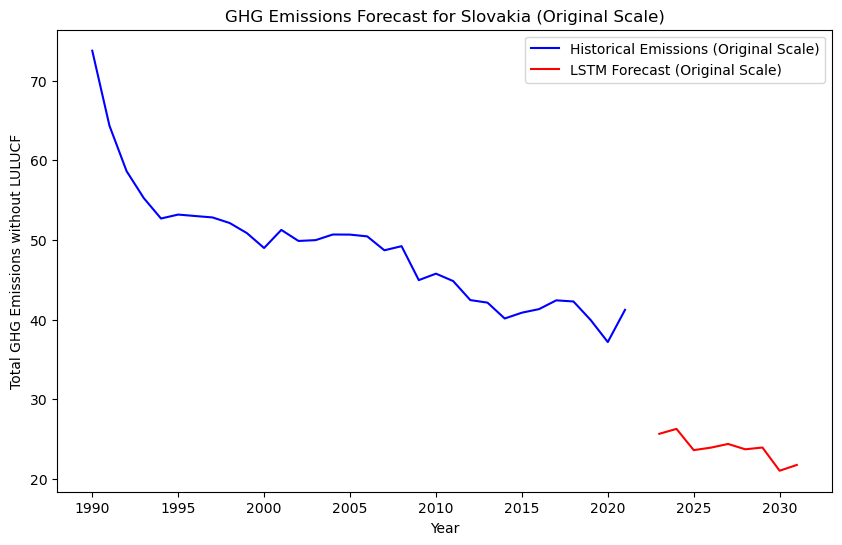

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Metrics for Spain (Fold 1):
MAE : 0.30978458908903556
MSE : 0.11144750096921711
RMSE : 0.33383753678880557
MAPE : 0.05183057110640199


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Metrics for Spain (Fold 2):
MAE : 0.6075580046741657
MSE : 0.3803153837313409
RMSE : 0.6166971572265766
MAPE : 0.10362623764298314


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Metrics for Spain (Fold 3):
MAE : 0.6510516702924235
MSE : 0.42688539374323486
RMSE : 0.6533646713308234
MAPE : 0.11252621818400259


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Metrics for Spain (Fold 4):
MAE : 0.6228346365910363
MSE : 0.38827829053780133
RMSE : 0.6231198043216098
MAPE : 0.10749813236806216


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Metrics for Spain (Fold 5):
MAE : 0.3413030009328872
MSE : 0.12608714169174937
RMSE : 0.3550875127229193
MAPE : 0.060179970979681745
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
            LSTM Forecast
2022-12-31       5.743241
2023-12-31       5.798632
2024-12-31       5.774507
2025-12-31       5.809175
2026-12-31       5.765611
2027-12-31       5.703380
2028-12-31       5.701496
2029-12-31       5.673234
2030-12-31       5.620257


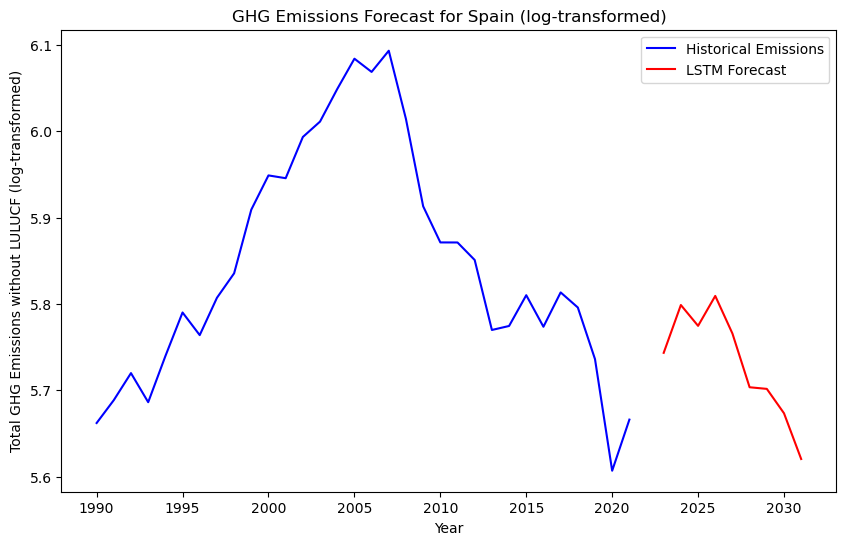

            LSTM Forecast
2022-12-31     312.074280
2023-12-31     329.847931
2024-12-31     321.985687
2025-12-31     333.343842
2026-12-31     319.134033
2027-12-31     299.879303
2028-12-31     299.314758
2029-12-31     290.974182
2030-12-31     275.960419


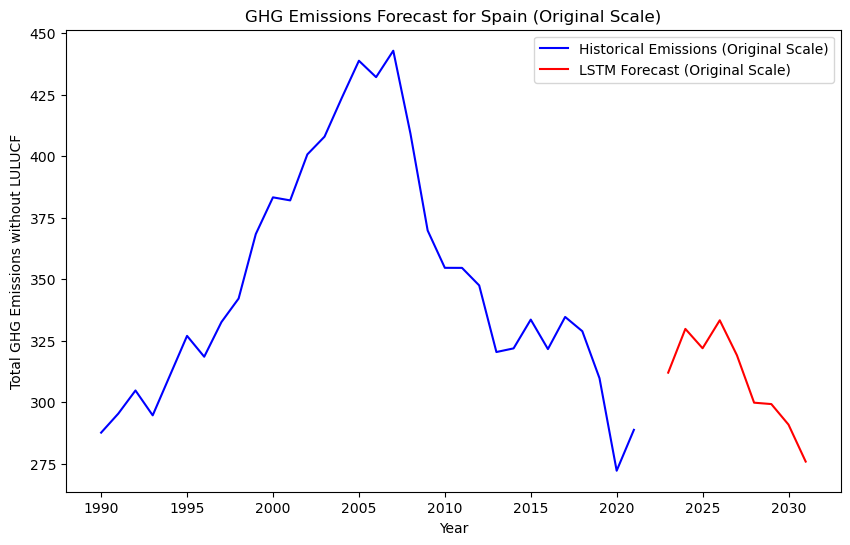

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
Metrics for Sweden (Fold 1):
MAE : 0.10551745746469887
MSE : 0.011722301412677676
RMSE : 0.10826957750299793
MAPE : 0.025590800425416452


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Metrics for Sweden (Fold 2):
MAE : 0.09451677560355787
MSE : 0.009160491004948453
RMSE : 0.09571045400032566
MAPE : 0.02301481575717225


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Metrics for Sweden (Fold 3):
MAE : 0.11602257791572927
MSE : 0.013830701170963142
RMSE : 0.1176040015091457
MAPE : 0.029070936016372895


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Metrics for Sweden (Fold 4):
MAE : 0.09968873458122311
MSE : 0.010677334499555246
RMSE : 0.10333118841644688
MAPE : 0.025179012861810263


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
Metrics for Sweden (Fold 5):
MAE : 0.018849718219334715
MSE : 0.0005551411711361354
RMSE : 0.0235614339787742
MAPE : 0.004898113527613616
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
            LSTM Forecast
2022-12-31       3.380849
2023-12-31       3.476919
2024-12-31       3.406531
2025-12-31       3.390996
2026-12-31       3.386924
2027-12-31       3.379174
2028-12-31       3.398875
2029-12-31       3.400933
2030-12-31       3.360722


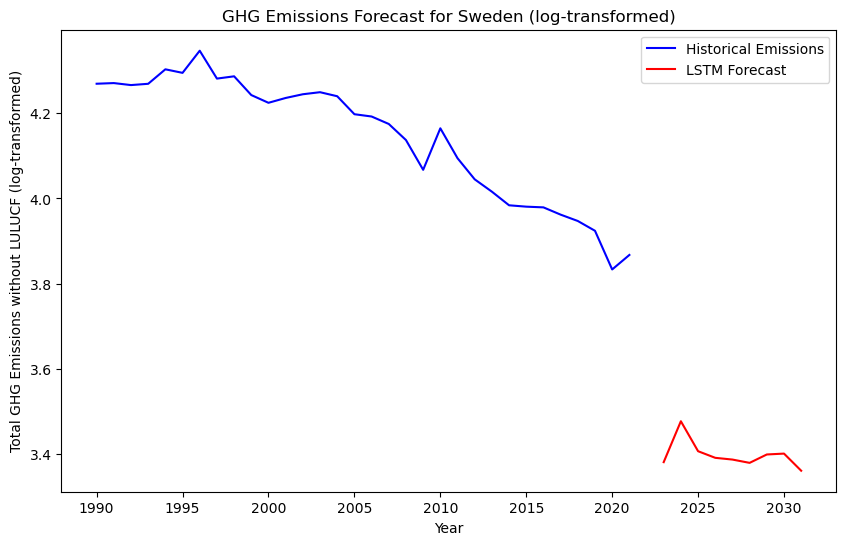

            LSTM Forecast
2022-12-31      29.395706
2023-12-31      32.359882
2024-12-31      30.160425
2025-12-31      29.695528
2026-12-31      29.574831
2027-12-31      29.346533
2028-12-31      29.930410
2029-12-31      29.992056
2030-12-31      28.809984


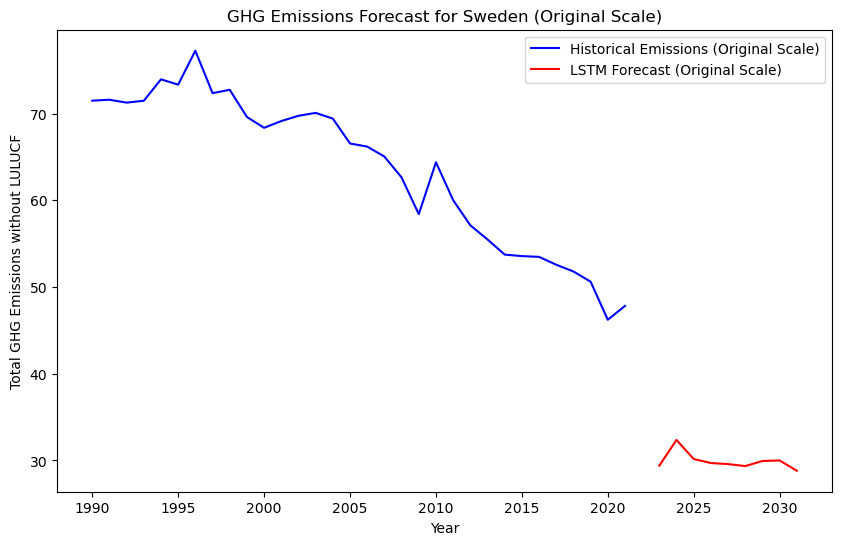

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
Metrics for Switzerland (Fold 1):
MAE : 0.012480009128027714
MSE : 0.00015596446808237776
RMSE : 0.01248857350069966
MAPE : 0.003124901543309041


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
Metrics for Switzerland (Fold 2):
MAE : 0.13899280909452902
MSE : 0.019998305223519225
RMSE : 0.1414153641706559
MAPE : 0.034963916164112235


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
Metrics for Switzerland (Fold 3):
MAE : 0.18724256486154767
MSE : 0.03709092301541002
RMSE : 0.19259003872321648
MAPE : 0.04784550075280073


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Metrics for Switzerland (Fold 4):
MAE : 0.05384580746676374
MSE : 0.002915094751176708
RMSE : 0.053991617415823985
MAPE : 0.013907856684772435


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Metrics for Switzerland (Fold 5):
MAE : 0.11749068881501963
MSE : 0.015018133125752531
RMSE : 0.12254849295586026
MAPE : 0.030897009862289566
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
            LSTM Forecast
2022-12-31       3.515750
2023-12-31       3.535960
2024-12-31       3.546215
2025-12-31       3.502209
2026-12-31       3.478527
2027-12-31       3.519808
2028-12-31       3.480450
2029-12-31       3.508253
2030-12-31       3.465650


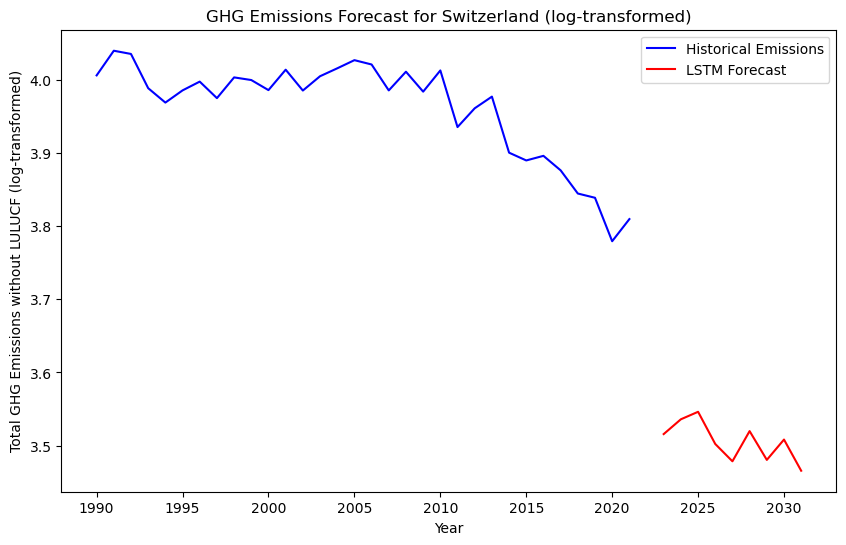

            LSTM Forecast
2022-12-31      33.641144
2023-12-31      34.327942
2024-12-31      34.681808
2025-12-31      33.188698
2026-12-31      32.411953
2027-12-31      33.777935
2028-12-31      32.474331
2029-12-31      33.389896
2030-12-31      31.997236


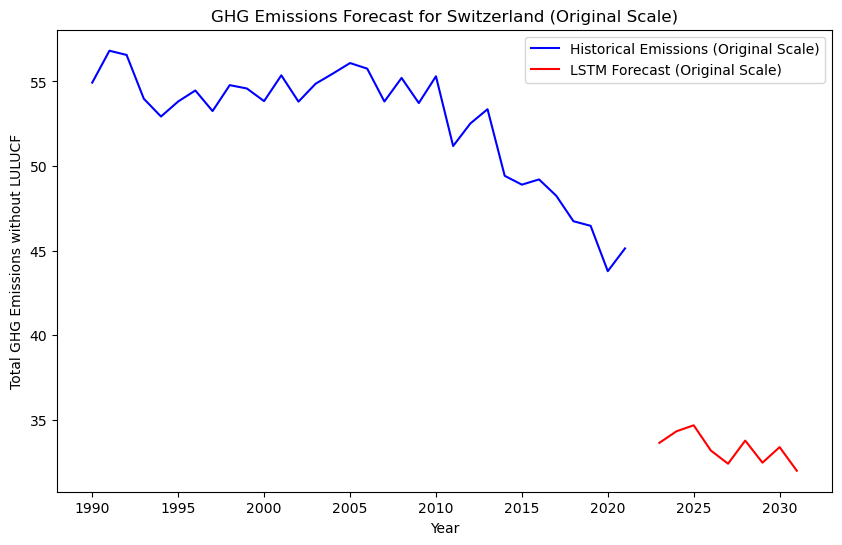

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
Metrics for Türkiye (Fold 1):
MAE : 0.56044892043316
MSE : 0.3305097358939026
RMSE : 0.5748997616053625
MAPE : 0.09385925771812571


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Metrics for Türkiye (Fold 2):
MAE : 0.06184802071614145
MSE : 0.004080617015263664
RMSE : 0.06387970738242046
MAPE : 0.0102203688498261


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Metrics for Türkiye (Fold 3):
MAE : 0.12961938816215804
MSE : 0.021125486838502502
RMSE : 0.14534609330319995
MAPE : 0.021103070833433973


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
Metrics for Türkiye (Fold 4):
MAE : 0.7902191629482272
MSE : 0.6415644512521846
RMSE : 0.800977185225762
MAPE : 0.12640345690988067


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Metrics for Türkiye (Fold 5):
MAE : 0.5184798948302584
MSE : 0.2695977559137244
RMSE : 0.5192280384510494
MAPE : 0.08264265190193565
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
            LSTM Forecast
2022-12-31       7.069686
2023-12-31       6.809471
2024-12-31       7.036918
2025-12-31       6.977953
2026-12-31       7.241262
2027-12-31       7.089229
2028-12-31       7.285589
2029-12-31       7.516917
2030-12-31       7.317980


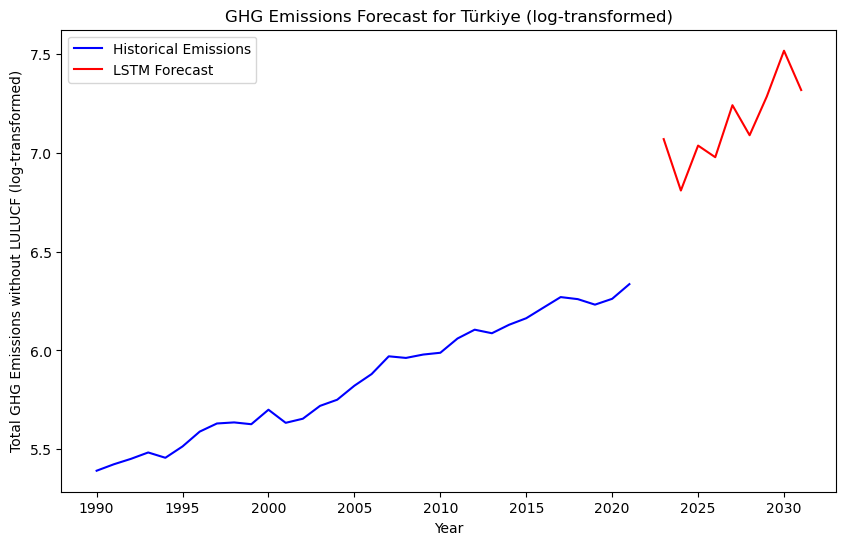

            LSTM Forecast
2022-12-31    1175.778687
2023-12-31     906.390930
2024-12-31    1137.875488
2025-12-31    1072.720703
2026-12-31    1395.855103
2027-12-31    1198.983154
2028-12-31    1459.120483
2029-12-31    1838.888672
2030-12-31    1507.156128


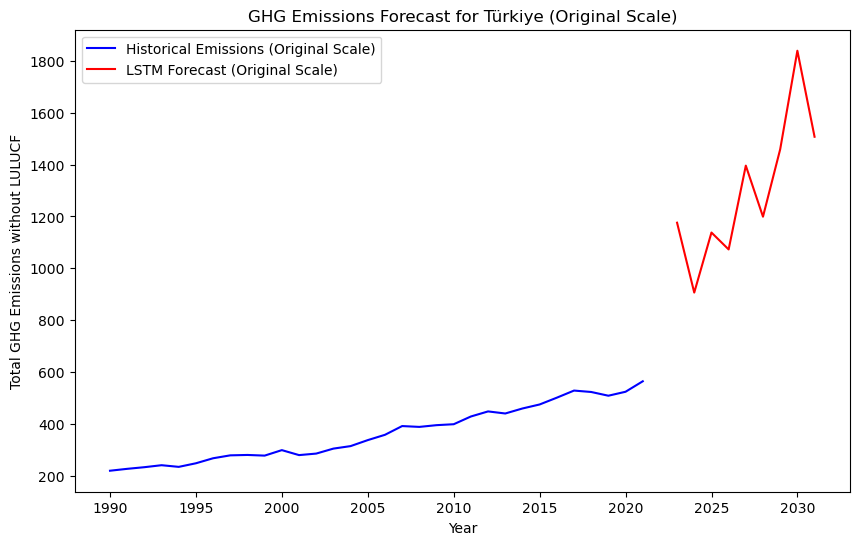

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Metrics for Ukraine (Fold 1):
MAE : 0.60643857631724
MSE : 0.36931930614490827
RMSE : 0.6077164685483751
MAPE : 0.09988794273072321


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Metrics for Ukraine (Fold 2):
MAE : 0.443183179769625
MSE : 0.20288873415790554
RMSE : 0.450431719751069
MAPE : 0.073397396378076


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Metrics for Ukraine (Fold 3):
MAE : 0.3514963444050843
MSE : 0.13361016459646965
RMSE : 0.36552724193481073
MAPE : 0.0593896653990531


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Metrics for Ukraine (Fold 4):
MAE : 0.21500593094486042
MSE : 0.04688056760987044
RMSE : 0.2165192084085623
MAPE : 0.036994220828278204


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Metrics for Ukraine (Fold 5):
MAE : 0.22853563589123857
MSE : 0.05434293377378779
RMSE : 0.23311570898115766
MAPE : 0.03948558330309664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
            LSTM Forecast
2022-12-31       5.243142
2023-12-31       5.284067
2024-12-31       5.238128
2025-12-31       5.328208
2026-12-31       5.297920
2027-12-31       5.139229
2028-12-31       5.224202
2029-12-31       5.267115
2030-12-31       5.197441


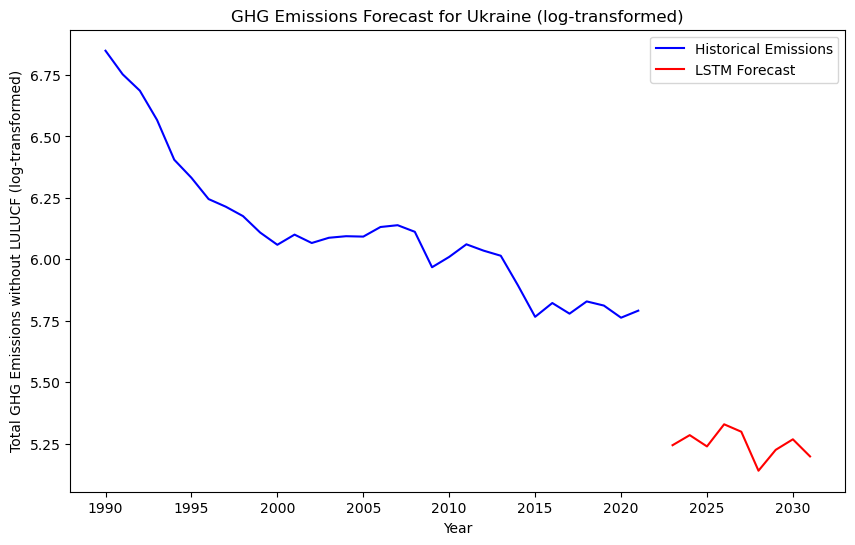

            LSTM Forecast
2022-12-31     189.263855
2023-12-31     197.170166
2024-12-31     188.317261
2025-12-31     206.068451
2026-12-31     199.920486
2027-12-31     170.584167
2028-12-31     185.712845
2029-12-31     193.855881
2030-12-31     180.808975


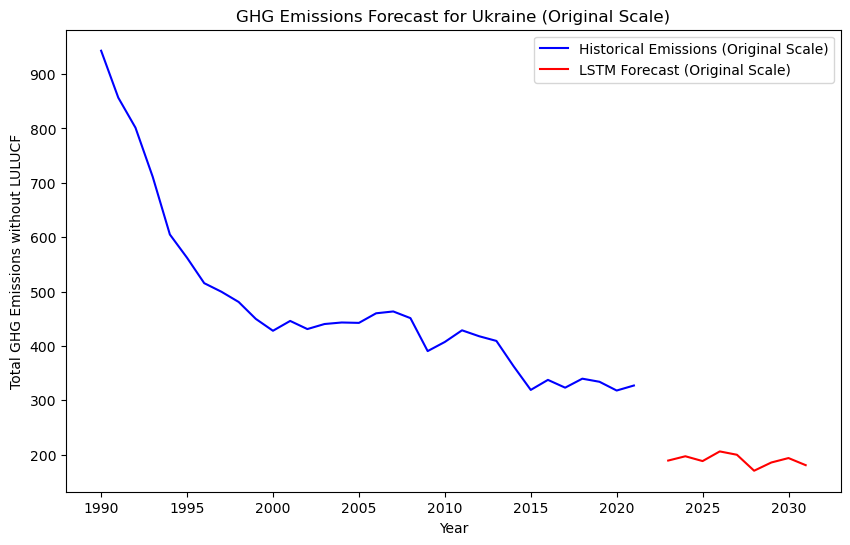

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 1):
MAE : 0.07724537745163869
MSE : 0.006972741267274763
RMSE : 0.08350294166839133
MAPE : 0.011899639207585098


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 2):
MAE : 0.08228239816670631
MSE : 0.007786522030336984
RMSE : 0.08824127169492167
MAPE : 0.012919086873409313


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 3):
MAE : 0.0704326105173596
MSE : 0.006413963445853893
RMSE : 0.08008722398643801
MAPE : 0.011157356460913509


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 4):
MAE : 0.02534315324787162
MSE : 0.0007248229598967173
RMSE : 0.026922536282763504
MAPE : 0.004111694211718677


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 5):
MAE : 0.08153604297529575
MSE : 0.00865215720598685
RMSE : 0.09301697267696284
MAPE : 0.013453763610851396
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
            LSTM Forecast
2022-12-31       5.570446
2023-12-31       5.522336
2024-12-31       5.485691
2025-12-31       5.519696
2026-12-31       5.513605
2027-12-31       5.541907
2028-12-31       5.398939
2029-12-31       5.391241
2030-12-31       5.338068


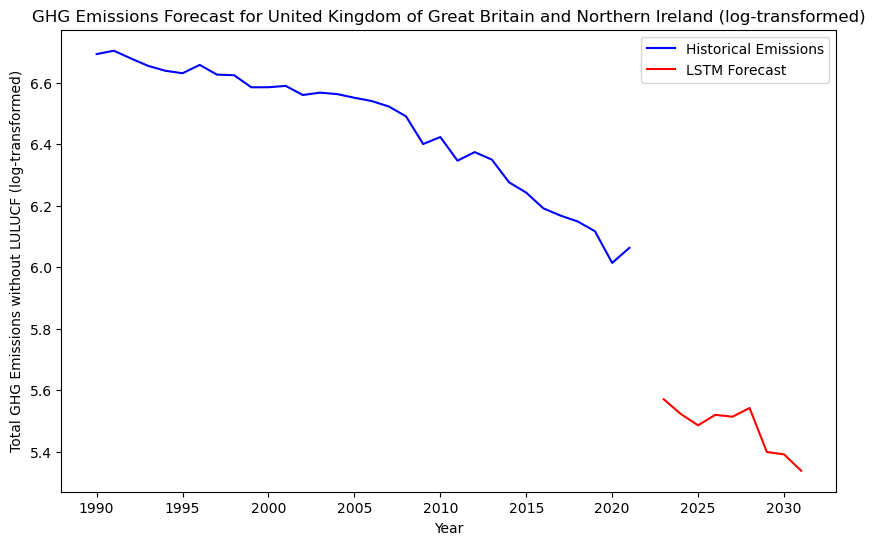

            LSTM Forecast
2022-12-31     262.551178
2023-12-31     250.218857
2024-12-31     241.215454
2025-12-31     249.559219
2026-12-31     248.043747
2027-12-31     255.164078
2028-12-31     221.171555
2029-12-31     219.475494
2030-12-31     208.110336


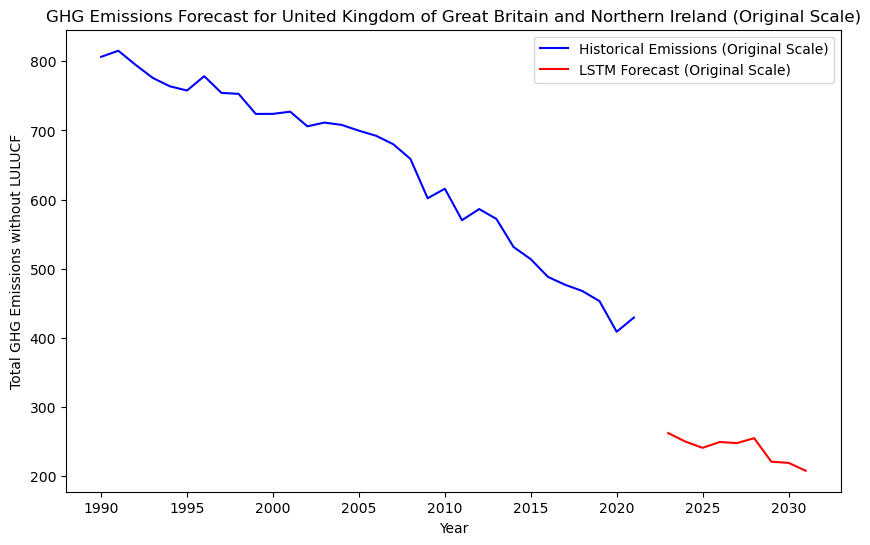

C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Metrics for United States of America (Fold 1):
MAE : 0.1814722118690503
MSE : 0.0373819988700547
RMSE : 0.19334424964310343
MAPE : 0.02039638995869526


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Metrics for United States of America (Fold 2):
MAE : 0.05629021884798924
MSE : 0.005316848708353639
RMSE : 0.0729167244763068
MAPE : 0.006384450771847818


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Metrics for United States of America (Fold 3):
MAE : 0.17675602384521957
MSE : 0.0317506792660675
RMSE : 0.17818720286840886
MAPE : 0.0200237605579309


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Metrics for United States of America (Fold 4):
MAE : 0.043128045144571324
MSE : 0.00240701118775115
RMSE : 0.04906130030636316
MAPE : 0.004905119031035025


C:\Users\DELL PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Metrics for United States of America (Fold 5):
MAE : 0.17673579491771285
MSE : 0.03301230213025395
RMSE : 0.18169287858981692
MAPE : 0.02018585992011455
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
            LSTM Forecast
2022-12-31       8.344207
2023-12-31       8.307394
2024-12-31       8.410350
2025-12-31       8.379672
2026-12-31       8.482661
2027-12-31       8.328331
2028-12-31       8.449536
2029-12-31       8.306278
2030-12-31       8.395308


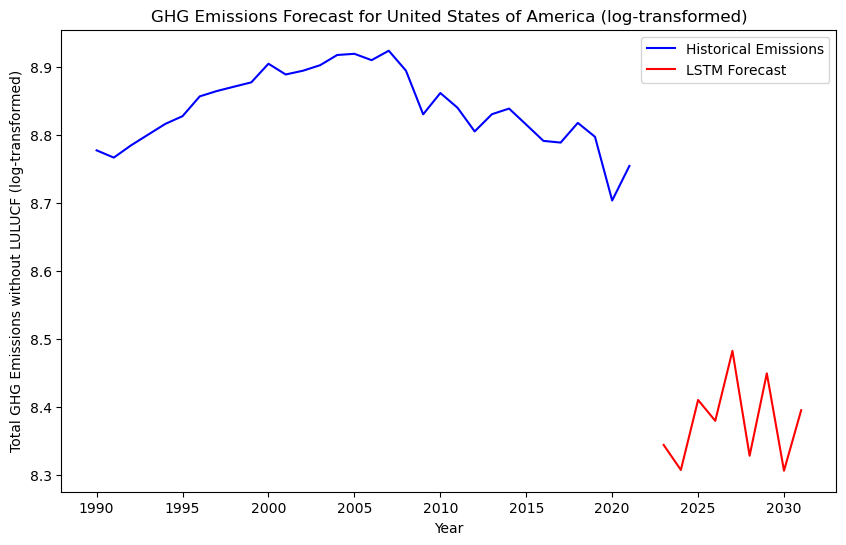

            LSTM Forecast
2022-12-31    4205.745605
2023-12-31    4053.735352
2024-12-31    4493.332031
2025-12-31    4357.579590
2026-12-31    4830.287598
2027-12-31    4139.502930
2028-12-31    4672.905273
2029-12-31    4049.214600
2030-12-31    4426.248047


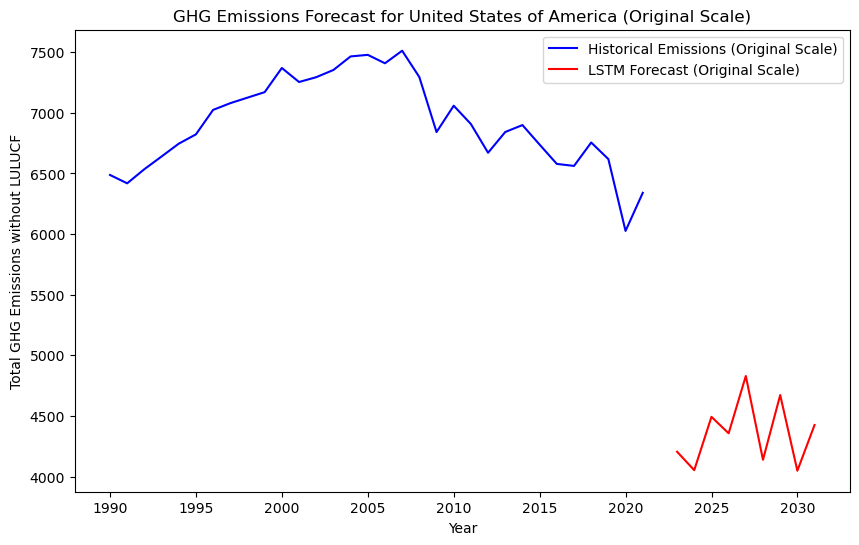

In [9]:
all_results = pd.DataFrame()

for country in emissions_log['Country'].unique():
    country_data = select_country(emissions_log, country, features, target)
    
    X = country_data[features].values
    y = country_data[target].values

    X_seq, y_seq = split_sequence(X, y, n_in, n_out)

    n_features = X_seq.shape[2]
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    for fold, (train_index, test_index) in enumerate(tscv.split(X_seq)):
        X_train, X_test = X_seq[train_index], X_seq[test_index]
        y_train, y_test = y_seq[train_index], y_seq[test_index]

        model = build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=1000, learning_rate=0.0001)

        yhat = model.predict(X_test)
        
        yhat = yhat[:, -1]
        y_test = y_test[:, -1]

        print(f"Metrics for {country} (Fold {fold + 1}):")
        metric(yhat, y_test)
    
    input_seq = X[-n_in:].reshape((1, n_in, n_features))
    forecast = model.predict(input_seq)[0]

    num_periods = n_out
    Year = pd.date_range(start=str(start_year), periods=num_periods, freq='A')
    LSTM_fcast_df = pd.DataFrame(forecast, index=Year[:num_periods], columns=['LSTM Forecast'])
    
    country_data_original_scale = np.exp(country_data)
    LSTM_fcast_original_scale = np.exp(LSTM_fcast_df)
    LSTM_fcast_df_original_scale = pd.DataFrame(LSTM_fcast_original_scale, index=Year, columns=['LSTM Forecast'])
    
    country_results = pd.concat([LSTM_fcast_df, LSTM_fcast_df_original_scale], axis=1)
    country_results['Country'] = country
    all_results = pd.concat([all_results, country_results])
    
    print(LSTM_fcast_df)
    plt.figure(figsize=(10, 6))
    plt.plot(country_data.index, y, label='Historical Emissions', color='blue')
    plt.plot(LSTM_fcast_df, label='LSTM Forecast', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF (log-transformed)')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (log-transformed)')
    plt.show() 
    
    print(LSTM_fcast_df_original_scale)
    plt.figure(figsize=(10, 6))
    plt.plot(country_data_original_scale.index, country_data_original_scale[target], label='Historical Emissions (Original Scale)', color='blue')
    plt.plot(LSTM_fcast_df_original_scale, label='LSTM Forecast (Original Scale)', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (Original Scale)')
    plt.show()
 
